# Fetching data from repository

In [1]:
!pip install optuna

In [2]:
!pip install xgboost

In [3]:
!pip install catboost

In [4]:
!pip install imbalanced-learn

In [5]:
!pip install lightgbm

In [6]:
!git clone https://github.com/Dexcop/AoL-Machine-Learning

Cloning into 'AoL-Machine-Learning'...


# EDA

In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [8]:
import warnings
warnings.filterwarnings('ignore')

In [9]:
url = "./AoL-Machine-Learning/heart_disease_uci.csv"
df = pd.read_csv(url)

### checking the basic information of this dataset

In [10]:
df.shape

(920, 16)

In [11]:
df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [12]:
df.sample(5)

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
534,535,46,Male,Hungary,asymptomatic,120.0,231.0,False,normal,115.0,True,0.0,NaN,NaN,NaN,1
767,768,51,Male,VA Long Beach,asymptomatic,128.0,0.0,False,normal,107.0,False,0.0,NaN,NaN,NaN,0
805,806,63,Male,VA Long Beach,asymptomatic,130.0,308.0,False,normal,138.0,True,2.0,flat,NaN,NaN,2
550,551,56,Male,Hungary,asymptomatic,150.0,213.0,True,normal,125.0,True,1.0,flat,NaN,NaN,1
40,41,65,Female,Cleveland,asymptomatic,150.0,225.0,False,lv hypertrophy,114.0,False,1.0,flat,3.0,reversable defect,4


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


In [14]:
df.isnull().sum().sort_values(ascending=False)

ca          611
thal        486
slope       309
fbs          90
oldpeak      62
trestbps     59
exang        55
thalch       55
chol         30
restecg       2
cp            0
dataset       0
id            0
age           0
sex           0
num           0
dtype: int64

### getting the proportion of null values and dropping the columns if it's above 30% since if the majority of a feature is null, it might as well doesn't matter (removing high missingness features)

In [15]:
df.isnull().mean().sort_values(ascending=False) * 100

ca          66.413043
thal        52.826087
slope       33.586957
fbs          9.782609
oldpeak      6.739130
trestbps     6.413043
exang        5.978261
thalch       5.978261
chol         3.260870
restecg      0.217391
cp           0.000000
dataset      0.000000
id           0.000000
age          0.000000
sex          0.000000
num          0.000000
dtype: float64

In [16]:
missing_values_threshold = df.isnull().mean() * 100
treshold = 30
high_missing_values_columns = missing_values_threshold[missing_values_threshold > treshold].index
high_missing_values_columns

Index(['slope', 'ca', 'thal'], dtype='object')

In [17]:
df = df.drop(columns=high_missing_values_columns)
df.shape

(920, 13)

In [18]:
df.columns

Index(['id', 'age', 'sex', 'dataset', 'cp', 'trestbps', 'chol', 'fbs',
       'restecg', 'thalch', 'exang', 'oldpeak', 'num'],
      dtype='object')

In [19]:
df.groupby('num')['oldpeak'].describe()

,count,mean,std,min,25%,50%,75%,max
num,,,,,,,,
0,390.0,0.418205,0.715636,-1.1,0.000,0.0,0.800,4.2
1,250.0,1.001200,1.035416,-2.6,0.000,1.0,1.800,5.0
2,101.0,1.353465,1.209592,-2.0,0.000,1.5,2.000,4.0
3,91.0,1.581319,1.325889,0.0,0.500,1.5,2.100,6.2
4,26.0,2.307692,1.304737,0.0,1.125,2.5,3.375,4.4


### checking proportions of the target column

In [20]:
df.iloc[:, -1].value_counts()

num
0    411
1    265
2    109
3    107
4     28
Name: count, dtype: int64

In [21]:
df = df[df['num'] != 4]

In [22]:
df.iloc[:, -1].value_counts()

num
0    411
1    265
2    109
3    107
Name: count, dtype: int64

In [23]:
sum_if_yes = 0.288043 + 0.118478 + 0.116304 + 0.030435
sum_if_yes

0.55326

make the proportion to yes and no which have 0.446739 and 0.55326 (way more balanced then 1-4)

In [24]:
# df.iloc[:, -1] = (df.num > 0).astype(int)

In [25]:
# df.iloc[:, -1].value_counts(normalize=True)

### splitting train and test set

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [28]:
X.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4


In [29]:
y.value_counts()

num
0    411
1    265
2    109
3    107
Name: count, dtype: int64

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(713, 12)
(179, 12)
(713,)
(179,)


In [31]:
y_train.value_counts()

num
0    328
1    212
2     87
3     86
Name: count, dtype: int64

In [32]:
y_test.value_counts()

num
0    83
1    53
2    22
3    21
Name: count, dtype: int64

### splitting columns by category and checking outliers

In [33]:
numerical_columns = X_train.select_dtypes(include=['number']).columns
numerical_columns

Index(['id', 'age', 'trestbps', 'chol', 'thalch', 'oldpeak'], dtype='object')

In [34]:
categorical_columns = X_train.select_dtypes(exclude=['number']).columns
categorical_columns

Index(['sex', 'dataset', 'cp', 'fbs', 'restecg', 'exang'], dtype='object')

In [35]:
len(numerical_columns)

6

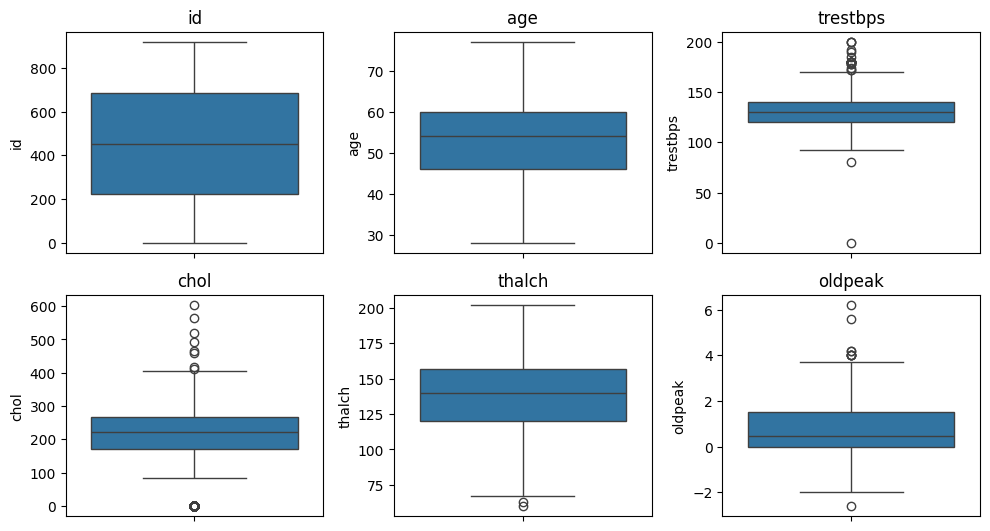

In [36]:
plt.figure(figsize=(10, 8))
for i in range(len(numerical_columns)):
  plt.subplot(3, 3, i+1)
  sns.boxplot(y=numerical_columns[i], data=X_train)
  plt.title(numerical_columns[i])
plt.tight_layout()
plt.show()

In [37]:
X_train[X_train['trestbps'] == 0]

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak
753,754,55,Male,VA Long Beach,non-anginal,0.0,0.0,False,normal,155.0,False,1.5


### outlier treatment

In [38]:
Q1 = X_train[numerical_columns].quantile(0.25)
Q3 = X_train[numerical_columns].quantile(0.75)
IQR = Q3 - Q1

upper_bound = Q3 + 1 * IQR
lower_bound = Q1 - 1 * IQR

In [39]:
upper_bound

id          1146.0
age           74.0
trestbps     160.0
chol         363.5
thalch       194.0
oldpeak        3.0
dtype: float64

In [40]:
lower_bound

id         -237.0
age          32.0
trestbps    100.0
chol         74.0
thalch       83.0
oldpeak      -1.5
dtype: float64

In [41]:
X_train[numerical_columns] = X_train[numerical_columns].mask(
    (X_train[numerical_columns] > upper_bound) | (X_train[numerical_columns] < lower_bound),
    np.nan
)
X_test[numerical_columns] = X_test[numerical_columns].mask(
    (X_test[numerical_columns] > upper_bound) | (X_test[numerical_columns] < lower_bound),
    np.nan
)

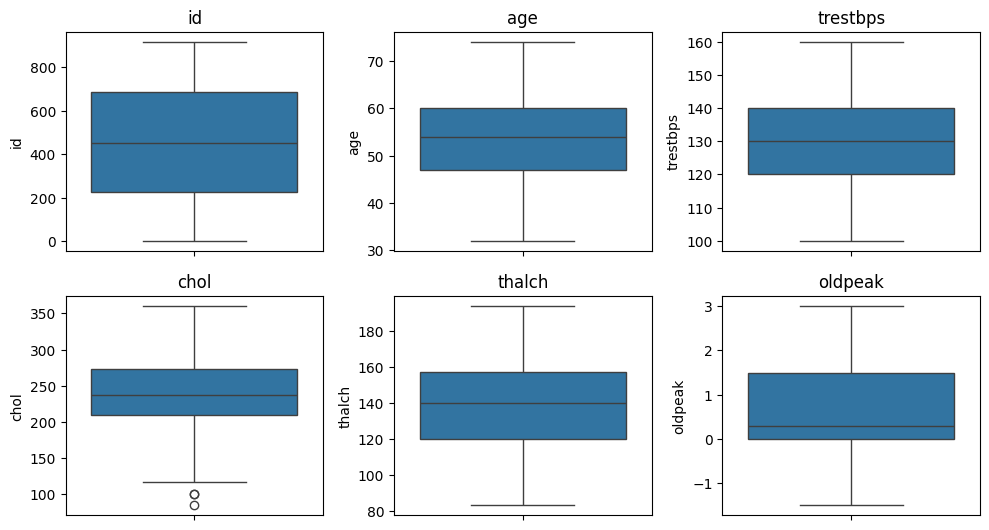

In [42]:
plt.figure(figsize=(10, 8))
for i in range(len(numerical_columns)):
  plt.subplot(3, 3, i+1)
  sns.boxplot(y=numerical_columns[i], data=X_train)
  plt.title(numerical_columns[i])
plt.tight_layout()
plt.show()

### since some columns such as: chol, trestbps, and oldpeak has so many outliers, the scaler that will be used is RobustScaler since outliers doesn't matter in that algorithm

In [43]:
from sklearn.preprocessing import RobustScaler, MinMaxScaler

In [44]:
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

In [45]:
X_train_scaled.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak
703,704,64.0,Male,Switzerland,asymptomatic,110.0,NaN,NaN,normal,114.0,True,1.3
608,609,41.0,Male,Switzerland,asymptomatic,125.0,NaN,NaN,normal,176.0,False,1.6
607,608,40.0,Male,Switzerland,asymptomatic,NaN,NaN,NaN,st-t abnormality,144.0,False,0.0
168,169,35.0,Male,Cleveland,asymptomatic,126.0,282.0,False,lv hypertrophy,156.0,True,0.0
334,335,39.0,Male,Hungary,atypical angina,120.0,NaN,False,st-t abnormality,146.0,False,2.0


In [46]:
X_test_scaled.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak
390,391,47.0,Male,Hungary,typical angina,110.0,249.0,False,normal,150.0,False,0.0
94,95,63.0,Female,Cleveland,non-anginal,135.0,252.0,False,lv hypertrophy,172.0,False,0.0
882,883,57.0,Male,VA Long Beach,asymptomatic,156.0,173.0,False,lv hypertrophy,119.0,True,3.0
432,433,52.0,Male,Hungary,atypical angina,160.0,196.0,False,normal,165.0,False,0.0
228,229,54.0,Male,Cleveland,asymptomatic,110.0,206.0,False,lv hypertrophy,108.0,True,0.0


In [47]:
robust_scaler = RobustScaler()
minmax_scaler = MinMaxScaler()

X_train_scaled[numerical_columns] = pd.DataFrame(minmax_scaler.fit_transform(X_train[numerical_columns]), index=X_train.index, columns=X_train[numerical_columns].columns)
X_test_scaled[numerical_columns] = pd.DataFrame(minmax_scaler.transform(X_test[numerical_columns]), index=X_test.index, columns=X_test[numerical_columns].columns)

In [48]:
X_train_scaled.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak
703,0.766630,0.761905,Male,Switzerland,asymptomatic,0.166667,NaN,NaN,normal,0.279279,True,0.622222
608,0.663032,0.214286,Male,Switzerland,asymptomatic,0.416667,NaN,NaN,normal,0.837838,False,0.688889
607,0.661941,0.190476,Male,Switzerland,asymptomatic,NaN,NaN,NaN,st-t abnormality,0.549550,False,0.333333
168,0.183206,0.071429,Male,Cleveland,asymptomatic,0.433333,0.716364,False,lv hypertrophy,0.657658,True,0.333333
334,0.364231,0.166667,Male,Hungary,atypical angina,0.333333,NaN,False,st-t abnormality,0.567568,False,0.777778


In [49]:
X_test_scaled.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak
390,0.425300,0.357143,Male,Hungary,typical angina,0.166667,0.596364,False,normal,0.603604,False,0.333333
94,0.102508,0.738095,Female,Cleveland,non-anginal,0.583333,0.607273,False,lv hypertrophy,0.801802,False,0.333333
882,0.961832,0.595238,Male,VA Long Beach,asymptomatic,0.933333,0.320000,False,lv hypertrophy,0.324324,True,1.000000
432,0.471101,0.476190,Male,Hungary,atypical angina,1.000000,0.403636,False,normal,0.738739,False,0.333333
228,0.248637,0.523810,Male,Cleveland,asymptomatic,0.166667,0.440000,False,lv hypertrophy,0.225225,True,0.333333


In [50]:
X_train_scaled.info()

<class 'pandas.core.frame.DataFrame'>
Index: 713 entries, 703 to 255
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        713 non-null    float64
 1   age       702 non-null    float64
 2   sex       713 non-null    object 
 3   dataset   713 non-null    object 
 4   cp        713 non-null    object 
 5   trestbps  625 non-null    float64
 6   chol      535 non-null    float64
 7   fbs       637 non-null    object 
 8   restecg   711 non-null    object 
 9   thalch    656 non-null    float64
 10  exang     673 non-null    object 
 11  oldpeak   647 non-null    float64
dtypes: float64(6), object(6)
memory usage: 72.4+ KB


### getting the heatmap of the rest of the missing values

<Axes: >

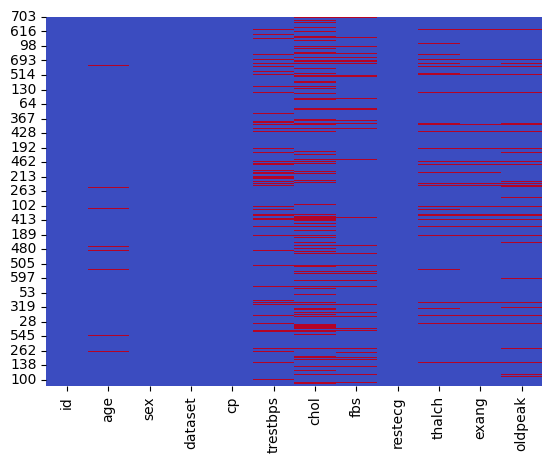

In [51]:
sns.heatmap(X_train_scaled.isnull(), cmap='coolwarm', cbar=False)

## missing value treatment

In [52]:
X_train_imputed = X_train_scaled.copy()
X_test_imputed = X_test_scaled.copy()

### numerical columns

In [53]:
from sklearn.impute import KNNImputer

knnImputer = KNNImputer(n_neighbors=5)

In [54]:
X_train_imputed[numerical_columns] = pd.DataFrame(knnImputer.fit_transform(X_train_scaled[numerical_columns]), index=X_train_scaled.index, columns=X_train_scaled[numerical_columns].columns)
X_test_imputed[numerical_columns] = pd.DataFrame(knnImputer.transform(X_test_scaled[numerical_columns]), index=X_test_scaled.index, columns=X_test_scaled[numerical_columns].columns)

In [55]:
X_train_imputed.isnull().sum().sort_values(ascending=False)

fbs         76
exang       40
restecg      2
id           0
dataset      0
sex          0
age          0
cp           0
chol         0
trestbps     0
thalch       0
oldpeak      0
dtype: int64

In [56]:
X_train_imputed.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak
703,0.766630,0.761905,Male,Switzerland,asymptomatic,0.166667,0.623273,NaN,normal,0.279279,True,0.622222
608,0.663032,0.214286,Male,Switzerland,asymptomatic,0.416667,0.610909,NaN,normal,0.837838,False,0.688889
607,0.661941,0.190476,Male,Switzerland,asymptomatic,0.333333,0.619636,NaN,st-t abnormality,0.549550,False,0.333333
168,0.183206,0.071429,Male,Cleveland,asymptomatic,0.433333,0.716364,False,lv hypertrophy,0.657658,True,0.333333
334,0.364231,0.166667,Male,Hungary,atypical angina,0.333333,0.455273,False,st-t abnormality,0.567568,False,0.777778


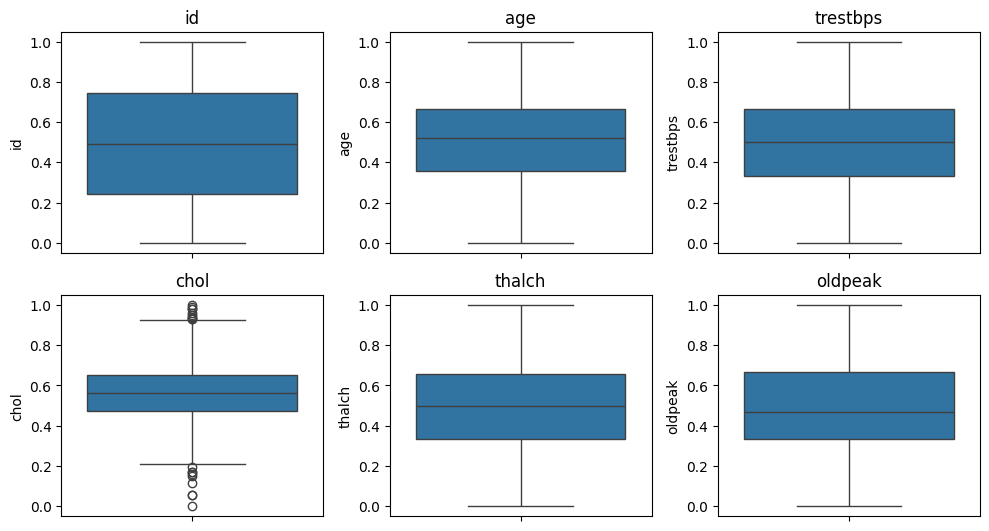

In [57]:
plt.figure(figsize=(10, 8))
for i in range(len(numerical_columns)):
  plt.subplot(3, 3, i+1)
  sns.boxplot(y=numerical_columns[i], data=X_train_imputed)
  plt.title(numerical_columns[i])
plt.tight_layout()
plt.show()

### categorical columns

In [58]:
cols_with_missing = [col for col in categorical_columns if X_train_imputed[col].isnull().sum() > 0]
print("Categorical columns to impute (in order):", cols_with_missing)

Categorical columns to impute (in order): ['fbs', 'restecg', 'exang']


In [59]:
from sklearn.ensemble import RandomForestClassifier
from imblearn.ensemble import BalancedRandomForestClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

In [60]:
X_train_imp = X_train_imputed[categorical_columns].copy()
X_test_imp = X_test_imputed[categorical_columns].copy()

X_train_imp.shape

(713, 6)

In [61]:
# fill_missing = SimpleImputer(strategy='constant', fill_value='missing')

# X_train_imputed = pd.DataFrame(fill_missing.fit_transform(X_train_imputed), index=X_train_imputed.index, columns=X_train_imputed.columns)
# X_test_imputed = pd.DataFrame(fill_missing.transform(X_test_imputed), index=X_test_imputed.index, columns=X_test_imputed.columns)

In [62]:
for col in cols_with_missing:
  print(f'Imputing feature: {col}')

  train_observed = X_train_imp[X_train_imp[col].notnull()]
  train_miss = X_train_imp[X_train_imp[col].isnull()]

  test_miss = X_test_imp[X_test_imp[col].isnull()]

  if not train_miss.empty:

      X_imp = train_observed.drop(columns=[col])
      y_imp = train_observed[col].astype(str)

      X_train_na = train_miss.drop(columns=[col])

      ohe = OneHotEncoder(
          # drop='first',
          handle_unknown='ignore',
          sparse_output=False
      )

      ohe.fit(X_imp)
      cols_name = ohe.get_feature_names_out()

      X_imp_encoded = pd.DataFrame(ohe.transform(X_imp),
                                  index=X_imp.index,
                                  columns=cols_name)
      X_train_na_enc = pd.DataFrame(ohe.transform(X_train_na),
                                  index=X_train_na.index,
                                  columns=cols_name)

      random_forest_classifier = BalancedRandomForestClassifier(
                                    random_state=42,
                                    # class_weight='balanced'
                                  )
      random_forest_classifier.fit(X_imp_encoded, y_imp)

      train_fill = random_forest_classifier.predict(X_train_na_enc)

      X_train_imputed.loc[train_miss.index, col] = train_fill

  if not test_miss.empty:
      X_test_na = test_miss.drop(columns=[col])
      ohe_test = OneHotEncoder(
          # drop='first',
          handle_unknown='ignore',
          sparse_output=False
      )
      ohe_test.fit(X_imp)
      cols_name_test = ohe_test.get_feature_names_out()

      X_test_na_enc  = pd.DataFrame(ohe_test.transform(X_test_na),
                                  index=X_test_na.index,
                                  columns=cols_name_test)

      test_fill = random_forest_classifier.predict(X_test_na_enc)

      X_test_imputed.loc[test_miss.index, col] = test_fill

Imputing feature: fbs
Imputing feature: restecg
Imputing feature: exang


In [63]:
X_train_imputed.isnull().sum().sort_values(ascending=False)

id          0
age         0
sex         0
dataset     0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
dtype: int64

In [64]:
X_test_imputed.isnull().sum().sort_values(ascending=False)

id          0
age         0
sex         0
dataset     0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
dtype: int64

In [65]:
X_train_imputed.info()

<class 'pandas.core.frame.DataFrame'>
Index: 713 entries, 703 to 255
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        713 non-null    float64
 1   age       713 non-null    float64
 2   sex       713 non-null    object 
 3   dataset   713 non-null    object 
 4   cp        713 non-null    object 
 5   trestbps  713 non-null    float64
 6   chol      713 non-null    float64
 7   fbs       713 non-null    object 
 8   restecg   713 non-null    object 
 9   thalch    713 non-null    float64
 10  exang     713 non-null    object 
 11  oldpeak   713 non-null    float64
dtypes: float64(6), object(6)
memory usage: 88.6+ KB


### feature engineering

In [66]:
X_train_engineered = X_train_imputed.copy()
X_test_engineered = X_test_imputed.copy()

In [67]:
X_train_engineered[numerical_columns] = minmax_scaler.inverse_transform(X_train_engineered[numerical_columns])
X_test_engineered[numerical_columns] = minmax_scaler.inverse_transform(X_test_engineered[numerical_columns])

trying to capture non-linear relationships by binning them into specific ranges to make the model more robust 

In [68]:
X_train_engineered['age_group'] = pd.cut(
    X_train_engineered['age'], bins=[29, 40, 55, 70, 100],
    labels=['Young', 'Middle-aged', 'Senior', 'Elderly']
)

X_test_engineered['age_group'] = pd.cut(
    X_test_engineered['age'], bins=[29, 40, 55, 70, 100],
    labels=['Young', 'Middle-aged', 'Senior', 'Elderly']
)

chol_bins = [0, 200, 240, np.inf]
chol_labels = ['Desirable', 'Borderline High', 'High']

X_train_engineered['chol_category'] = pd.cut(
    X_train_engineered['chol'],
    bins=chol_bins,
    labels=chol_labels,
    right=False
)

X_test_engineered['chol_category'] = pd.cut(
    X_test_engineered['chol'],
    bins=chol_bins,
    labels=chol_labels,
    right=False
)

bp_bins = [0, 120, 130, 140, 180, np.inf]
bp_labels = ['Normal', 'Elevated', 'Stage 1', 'Stage 2', 'Crisis']

X_train_engineered['bp_category'] = pd.cut(
    X_train_engineered['trestbps'],
    bins=bp_bins,
    labels=bp_labels,
    right=False
)

X_test_engineered['bp_category'] = pd.cut(
    X_test_engineered['trestbps'],
    bins=bp_bins,
    labels=bp_labels,
    right=False
)

idea: maybe the effect of cholesterol will be depended with their age or vice versa, hence trying to combine both of these features

In [69]:
X_train_engineered['age_chol'] = X_train_engineered['age'] * X_train_engineered['chol']
X_test_engineered['age_chol'] = X_test_engineered['age'] * X_test_engineered['chol']

idea: thalch (raw maximum heart rate) is not informative at all. Hence trying to get the maximum heart rate reserve percentage that can be get through dividing it by (220 - age) albeit using the simplified estimation, it may contain more information than the original data

In [70]:
X_train_engineered['heart_rate_reserve'] = X_train_engineered['thalch'] / (220 - X_train_engineered['age'])
X_test_engineered['heart_rate_reserve'] = X_test_engineered['thalch'] / (220 - X_test_engineered['age'])

- another way of processing thalch just by dividing them and getting the simple ratio form, exploration which is more informative or the both of them are equally important or not (selection will be done at the end)
- trying to capture interdependent features, by combining oldpeak (represents ECG changes during stress) and thalch (which is the peak heart rate during that stress) and by multiplying them, it creates a feature that represents both 'intensity' and 'severity' of the cardiovascular responses during stress

In [71]:
X_train_engineered['thalch_div_age'] = X_train_engineered['thalch'] / (X_train_engineered['age'] + 1)
X_train_engineered['peak_stress'] = X_train_engineered['oldpeak'] * X_train_engineered['thalch']

X_test_engineered['thalch_div_age'] = X_test_engineered['thalch'] / (X_test_engineered['age'] + 1)
X_test_engineered['peak_stress'] = X_test_engineered['oldpeak'] * X_test_engineered['thalch']

In [72]:
minmax_scaler.fit(X_train_engineered[numerical_columns])

MinMaxScaler()

In [73]:
X_train_engineered[numerical_columns] = pd.DataFrame(
    minmax_scaler.transform(X_train_engineered[numerical_columns]),
    index=X_train_engineered.index,
    columns=X_train_engineered[numerical_columns].columns
)

X_test_engineered[numerical_columns] = pd.DataFrame(
    minmax_scaler.transform(X_test_engineered[numerical_columns]),
    index=X_test_engineered.index,
    columns=X_test_engineered[numerical_columns].columns
)

In [74]:
X_train_engineered.columns

Index(['id', 'age', 'sex', 'dataset', 'cp', 'trestbps', 'chol', 'fbs',
       'restecg', 'thalch', 'exang', 'oldpeak', 'age_group', 'chol_category',
       'bp_category', 'age_chol', 'heart_rate_reserve', 'thalch_div_age',
       'peak_stress'],
      dtype='object')

### feature encoding

In [75]:
categorical_columns = X_train_engineered.select_dtypes(exclude=['number']).columns
categorical_columns

Index(['sex', 'dataset', 'cp', 'fbs', 'restecg', 'exang', 'age_group',
       'chol_category', 'bp_category'],
      dtype='object')

In [76]:
X_train_encoded = X_train_engineered.copy()
X_test_encoded = X_test_engineered.copy()

In [77]:
ohe = ColumnTransformer(
    transformers=[
        ('ohe', OneHotEncoder(
            # drop='first',
            handle_unknown='ignore',
            sparse_output=False
        ), categorical_columns)
    ],
    remainder='passthrough'
)

In [78]:
for col in categorical_columns:
  X_train_encoded[col] = X_train_encoded[col].astype(str)
  X_test_encoded[col] = X_test_encoded[col].astype(str)

In [79]:
# X_train_encoded.info()

In [80]:
X_train_encoded = pd.DataFrame(ohe.fit_transform(X_train_encoded), index=X_train_encoded.index, columns=ohe.get_feature_names_out())
X_test_encoded = pd.DataFrame(ohe.transform(X_test_encoded), index=X_test_encoded.index, columns=ohe.get_feature_names_out())

X_train_encoded.head()

,ohe__sex_Female,ohe__sex_Male,ohe__dataset_Cleveland,ohe__dataset_Hungary,ohe__dataset_Switzerland,ohe__dataset_VA Long Beach,ohe__cp_asymptomatic,ohe__cp_atypical angina,ohe__cp_non-anginal,ohe__cp_typical angina,...,remainder__id,remainder__age,remainder__trestbps,remainder__chol,remainder__thalch,remainder__oldpeak,remainder__age_chol,remainder__heart_rate_reserve,remainder__thalch_div_age,remainder__peak_stress
703,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.766630,0.761905,0.166667,0.623273,0.279279,0.622222,16409.6,0.730769,1.753846,148.2
608,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.663032,0.214286,0.416667,0.610909,0.837838,0.688889,10373.0,0.983240,4.190476,281.6
607,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.661941,0.190476,0.333333,0.619636,0.549550,0.333333,10216.0,0.800000,3.512195,0.0
168,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.183206,0.071429,0.433333,0.716364,0.657658,0.333333,9870.0,0.843243,4.333333,0.0
334,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.364231,0.166667,0.333333,0.455273,0.567568,0.777778,8197.8,0.806630,3.650000,292.0


### feature selection

In [81]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel

In [82]:
X_train_selected = X_train_encoded.copy()
X_test_selected = X_test_encoded.copy()

In [83]:
X_train_encoded.shape

(713, 38)

In [84]:
X_train_selected = X_train_selected.drop(columns=['remainder__id'])
X_test_selected = X_test_selected.drop(columns=['remainder__id'])

Xtra Tree Classifier

In [85]:
etc = ExtraTreesClassifier(random_state=42)
etc.fit(X_train_selected, y_train)

importances = etc.feature_importances_

feat_imp = pd.Series(importances, index=X_train_selected.columns)
feat_imp = feat_imp.sort_values(ascending=False)
print("Top features:\n", feat_imp.head(35))

Top features:
 ohe__cp_asymptomatic                  0.060019
remainder__oldpeak                    0.051993
remainder__heart_rate_reserve         0.051555
remainder__thalch_div_age             0.049814
remainder__peak_stress                0.049600
remainder__age_chol                   0.048442
remainder__thalch                     0.048212
remainder__chol                       0.046876
remainder__age                        0.046721
remainder__trestbps                   0.041766
ohe__dataset_Hungary                  0.033954
ohe__exang_True                       0.031395
ohe__dataset_Switzerland              0.030961
ohe__exang_False                      0.028986
ohe__cp_atypical angina               0.023611
ohe__age_group_Senior                 0.021780
ohe__bp_category_Stage 2              0.021588
ohe__dataset_Cleveland                0.021263
ohe__bp_category_Elevated             0.021038
ohe__restecg_normal                   0.020025
ohe__sex_Male                         0.01998

In [86]:
selector = SelectFromModel(estimator=etc, threshold='mean')
selector.fit(X_train_selected, y_train)
X_train_selected = pd.DataFrame(selector.transform(X_train_selected), index=X_train_selected.index, columns=X_train_selected.columns[selector.get_support()])
X_test_selected = pd.DataFrame(selector.transform(X_test_selected), index=X_test_selected.index, columns=X_test_selected.columns[selector.get_support()])
print(X_train_selected.shape)
print(X_test_selected.shape)

(713, 14)
(179, 14)


In [87]:
X_train_selected.columns

numerical_columns = X_train_selected.select_dtypes(include=['number']).columns
numerical_columns

Index(['ohe__dataset_Hungary', 'ohe__dataset_Switzerland',
       'ohe__cp_asymptomatic', 'ohe__exang_False', 'ohe__exang_True',
       'remainder__age', 'remainder__trestbps', 'remainder__chol',
       'remainder__thalch', 'remainder__oldpeak', 'remainder__age_chol',
       'remainder__heart_rate_reserve', 'remainder__thalch_div_age',
       'remainder__peak_stress'],
      dtype='object')

### Base Model for Checking Preprocessing

In [88]:
X_train, X_test = X_train_selected, X_test_selected

In [89]:
X_train.shape

(713, 14)

In [90]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from imblearn.ensemble import BalancedRandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

              precision    recall  f1-score   support

           0       0.74      0.84      0.79        83
           1       0.42      0.66      0.51        53
           2       0.50      0.05      0.08        22
           3       0.00      0.00      0.00        21

    accuracy                           0.59       179
   macro avg       0.42      0.39      0.35       179
weighted avg       0.53      0.59      0.53       179



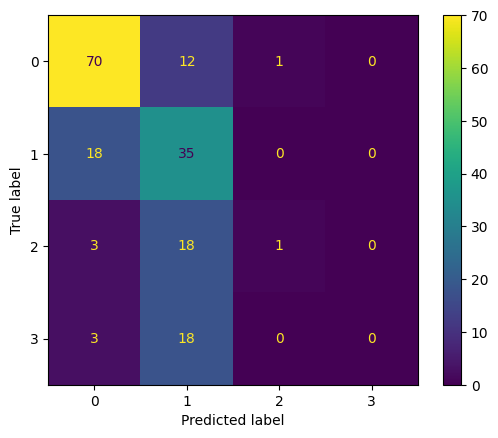

In [91]:
base_model = LogisticRegression(random_state=42)
base_model.fit(X_train, y_train)

y_pred = base_model.predict(X_test)

print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [92]:
cv_out = StratifiedKFold(
    n_splits=10,
    shuffle=True,
    random_state=42
)

print(cross_val_score(base_model, X_train, y_train, cv=cv_out, scoring='accuracy').mean()*100)
print(cross_val_score(base_model, X_train, y_train, cv=cv_out, scoring='accuracy').std()*100)

53.31377151799687
3.2798718901942454


              precision    recall  f1-score   support

           0       0.72      0.82      0.77        83
           1       0.46      0.42      0.44        53
           2       0.24      0.18      0.21        22
           3       0.40      0.38      0.39        21

    accuracy                           0.57       179
   macro avg       0.45      0.45      0.45       179
weighted avg       0.55      0.57      0.56       179

55.70226917057903
5.347437891628078
41.9572312445949
7.403593105556057


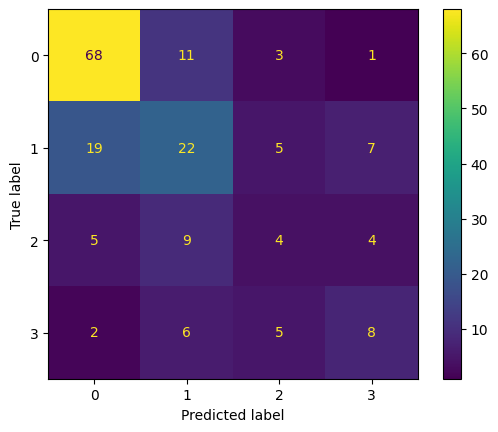

In [93]:
rf = RandomForestClassifier(
    random_state=42,
    class_weight='balanced'
)

rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

print(classification_report(y_test, y_pred))
print(cross_val_score(rf, X_train, y_train, cv=cv_out, scoring='accuracy').mean()*100)
print(cross_val_score(rf, X_train, y_train, cv=cv_out, scoring='accuracy').std()*100)
print(cross_val_score(rf, X_train, y_train, cv=cv_out, scoring='f1_macro').mean()*100)
print(cross_val_score(rf, X_train, y_train, cv=cv_out, scoring='f1_macro').std()*100)
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

              precision    recall  f1-score   support

           0       0.84      0.70      0.76        83
           1       0.60      0.47      0.53        53
           2       0.30      0.41      0.35        22
           3       0.32      0.57      0.41        21

    accuracy                           0.58       179
   macro avg       0.51      0.54      0.51       179
weighted avg       0.64      0.58      0.60       179

54.58724569640062
8.242176536696707
47.37309720589377
7.5246706991805565


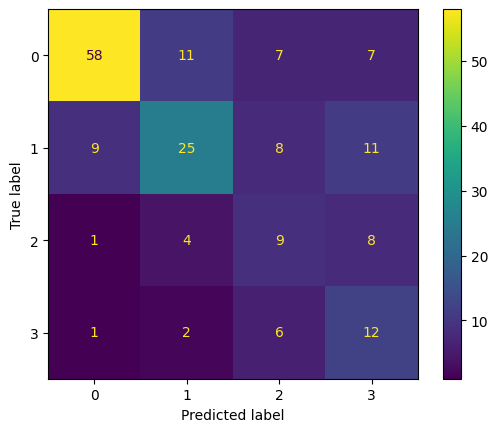

In [94]:
rf = BalancedRandomForestClassifier(
    random_state=42,
    # class_weight='balanced'
)

rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

print(classification_report(y_test, y_pred))
print(cross_val_score(rf, X_train, y_train, cv=cv_out, scoring='accuracy').mean()*100)
print(cross_val_score(rf, X_train, y_train, cv=cv_out, scoring='accuracy').std()*100)
print(cross_val_score(rf, X_train, y_train, cv=cv_out, scoring='f1_macro').mean()*100)
print(cross_val_score(rf, X_train, y_train, cv=cv_out, scoring='f1_macro').std()*100)
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

modeling will be done with the result given from random forest in mind

### experimentation: plotting to see possible clusters in a low dimension

In [95]:
from sklearn.decomposition import PCA

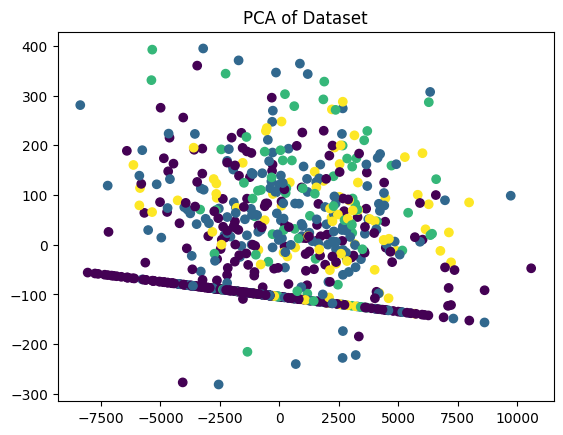

In [96]:
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X_train)
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y_train, cmap='viridis')
plt.title("PCA of Dataset")
plt.show()

verdict: not recommended to use dimension reduction since the cluster distribution is all over the place with a low dimension

removing multicollinearity

In [97]:
X_train_selected.shape

(713, 14)

In [98]:
X_train_multi = X_train_selected.copy()
X_test_multi = X_test_selected.copy()

In [99]:
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

In [100]:
pca = PCA(0.95, random_state=42)
lda = LDA(n_components=1)

X_train_multi = pd.DataFrame(lda.fit_transform(X_train_selected, y_train), index=X_train_selected.index)
X_test_multi = pd.DataFrame(lda.transform(X_test_selected), index=X_test_selected.index)
# X_train_selected = pd.DataFrame(pca.fit_transform(X_train_selected), index=X_train_selected.index)
# X_test_selected = pd.DataFrame(pca.transform(X_test_selected), index=X_test_selected.index)

# Modeling

In [101]:
from imblearn.ensemble import BalancedRandomForestClassifier
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE, ADASYN, KMeansSMOTE, SMOTENC, SMOTEN, SVMSMOTE
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from imblearn.combine import SMOTEENN, SMOTETomek
from imblearn.under_sampling import TomekLinks, RandomUnderSampler, ClusterCentroids, NearMiss, EditedNearestNeighbours, RepeatedEditedNearestNeighbours

In [102]:
categorical_columns = X_train.select_dtypes(exclude='number')

In [103]:
# samplers = [
#     SMOTE(random_state=42),
#     ADASYN(random_state=42),
#     KMeansSMOTE(random_state=42),
#     SMOTENC(random_state=42, categorical_features=categorical_columns),
#     SMOTEN(random_state=42),
#     SVMSMOTE(random_state=42),
#     SMOTEENN(random_state=42),
#     SMOTETomek(random_state=42),
#     RandomUnderSampler(random_state=42),
#     TomekLinks(sampling_strategy='majority'),
#     TomekLinks(),
#     ClusterCentroids(random_state=42),
#     NearMiss(version=1),
#     EditedNearestNeighbours(),
#     RepeatedEditedNearestNeighbours(),
#     None
# ]

# param_grid = {
#     'balancer': samplers
# }

# pipeline = Pipeline([
#     ('balancer', SMOTE()),  # default, overwritten in GridSearch
#     ('model', LogisticRegression(
#         class_weight='balanced',
#         random_state=42,
#         # n_estimators=100
#       ))
# ])

# grid = GridSearchCV(
#     pipeline,
#     param_grid=param_grid,
#     cv=cv_out,
#     scoring='f1_macro',
#     verbose=3
# )

# grid.fit(X_train, y_train)
# print(grid.best_estimator_)
# print(grid.best_score_)

In [104]:
# y_pred = grid.best_estimator_.predict(X_test)

# print(classification_report(y_test, y_pred))
# print(cross_val_score(grid.best_estimator_, X_train, y_train, cv=cv_out, scoring='accuracy').mean()*100)
# print(cross_val_score(grid.best_estimator_, X_train, y_train, cv=cv_out, scoring='accuracy').std()*100)
# print(cross_val_score(grid.best_estimator_, X_train, y_train, cv=cv_out, scoring='f1_macro').mean()*100)
# print(cross_val_score(grid.best_estimator_, X_train, y_train, cv=cv_out, scoring='f1_macro').std()*100)
# cm = confusion_matrix(y_test, y_pred)
# disp = ConfusionMatrixDisplay(confusion_matrix=cm)
# disp.plot()
# plt.show()

the best results: (documented so that i don't need to run it again)

Pipeline(steps=[('balancer', TomekLinks(sampling_strategy='majority')),
                ('model', BalancedRandomForestClassifier(random_state=42))])

Pipeline(steps=[('balancer', NearMiss()),
                ('model',
                 RandomForestClassifier(class_weight='balanced',
                                        random_state=42))])

Pipeline(steps=[('balancer', NearMiss()),
                ('model', RandomForestClassifier(random_state=42))])

Pipeline(steps=[('balancer', SMOTEN(random_state=42)),
                ('model', LogisticRegression(random_state=42))]) -> p bad

Pipeline(steps=[('balancer', SMOTEN(random_state=42)),
                ('model',
                 LogisticRegression(class_weight='balanced', random_state=42))])

In [105]:
# best_sampler = grid.best_estimator_.named_steps["balancer"]

In [106]:
from scipy.stats import uniform, randint, loguniform

In [107]:
# pipeline = Pipeline([
#     # ('balancer', TomekLinks(sampling_strategy='majority')),
#     ('balancer', NearMiss()),
#     # ('balancer', SMOTEN(random_state=42)),
#     ('model', RandomForestClassifier(random_state=42))
# ])

# param_dist = {
#     'model__n_estimators': randint(100, 1500), # Sample # of trees between 100 and 1499
#     'model__max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None], # Mix specific depths & None
#     'model__min_samples_split': randint(2, 21), # Sample min split between 2 and 20
#     'model__min_samples_leaf': randint(1, 11),  # Sample min leaf between 1 and 10
#     'model__max_features': ['sqrt', 'log2', 0.4, 0.6, 0.8], # Common strategies + proportions
#     'model__class_weight': [None, 'balanced', {0: 1, 1: 5}, {0: 1, 1: 10}], # None=Base, balanced, + specific examples if needed
#     'model__bootstrap': [True, False] # Optionally, search whether to use bootstrap samples
# }

# # param_dist = [
# #     { # L2 Regularization
# #         'model__penalty': ['l2'],
# #         'model__C': loguniform(0.001, 1000), # Sample C from 0.001 to 1000 on a log scale
# #         'model__solver': ['liblinear', 'lbfgs', 'saga'],
# #         'model__class_weight': [None, 'balanced']
# #     },
# #     { # L1 Regularization
# #         'model__penalty': ['l1'],
# #         'model__C': loguniform(0.001, 1000),
# #         'model__solver': ['liblinear', 'saga'],
# #         'model__class_weight': [None, 'balanced']
# #     },
# #     { # ElasticNet (requires 'saga' and 'l1_ratio')
# #         'model__penalty': ['elasticnet'],
# #         'model__C': loguniform(0.001, 1000),
# #         'model__solver': ['saga'],
# #         'model__l1_ratio': [0.3, 0.5, 0.7], # Specify L1 ratio for ElasticNet
# #         'model__class_weight': [None, 'balanced']
# #     }
# # ]

# random_search = RandomizedSearchCV(
#     pipeline,
#     param_distributions=param_dist,
#     n_iter=100,  # You can increase this later
#     cv=cv_out,
#     scoring='f1_macro',
#     random_state=42,
#     verbose=3,
#     # n_jobs=-1
# )

# random_search.fit(X_train, y_train)
# print(random_search.best_estimator_)
# print(random_search.best_score_)

In [108]:
'''Pipeline(steps=[('balancer', TomekLinks(sampling_strategy='majority')),
                ('model',
                 RandomForestClassifier(class_weight='balanced', max_depth=80,
                                        max_features=0.8, min_samples_leaf=2,
                                        min_samples_split=16, n_estimators=1176,
                                        random_state=42))])
0.467293025302803'''

"Pipeline(steps=[('balancer', TomekLinks(sampling_strategy='majority')),\n                ('model',\n                 RandomForestClassifier(class_weight='balanced', max_depth=80,\n                                        max_features=0.8, min_samples_leaf=2,\n                                        min_samples_split=16, n_estimators=1176,\n                                        random_state=42))])\n0.467293025302803"

In [109]:
# y_pred = random_search.best_estimator_.predict(X_test)

# print(classification_report(y_test, y_pred))
# print('accuracy: ', cross_val_score(random_search.best_estimator_, X_train, y_train, cv=cv_out, scoring='accuracy').mean()*100)
# print('accuracy: ', cross_val_score(random_search.best_estimator_, X_train, y_train, cv=cv_out, scoring='accuracy').std()*100)
# print('f1_macro: ', cross_val_score(random_search.best_estimator_, X_train, y_train, cv=cv_out, scoring='f1_macro').mean()*100)
# print('f1_macro: ', cross_val_score(random_search.best_estimator_, X_train, y_train, cv=cv_out, scoring='f1_macro').std()*100)
# cm = confusion_matrix(y_test, y_pred)
# disp = ConfusionMatrixDisplay(confusion_matrix=cm)
# disp.plot()
# plt.show()

selecting a couple of promising models in case ensembling is needed, but if target is reached then just select the best model and do deployment

Promising models:

Pipeline(steps=[('balancer', TomekLinks(sampling_strategy='majority')),
                ('model',
                 BalancedRandomForestClassifier(max_depth=29,
                                                min_samples_leaf=2,
                                                min_samples_split=5,
                                                n_estimators=141,
                                                random_state=42))])

Pipeline(steps=[('balancer', NearMiss()),
                ('model',
                 RandomForestClassifier(max_depth=80, min_samples_split=3,
                                        n_estimators=741, random_state=42))])

Pipeline(steps=[('balancer', TomekLinks(sampling_strategy='majority')),
                ('model',
                 RandomForestClassifier(class_weight='balanced', max_depth=80,
                                        max_features=0.8, min_samples_leaf=2,
                                        min_samples_split=16, n_estimators=1176,
                                        random_state=42))])

Pipeline(steps=[('balancer', SMOTEN(random_state=42)),
                ('model',
                 LogisticRegression(C=np.float64(1.0377055497115122),
                                    class_weight='balanced', penalty='l1',
                                    random_state=42, solver='liblinear'))])



# Boosting

## getting other models

In [110]:
from xgboost import XGBClassifier

In [111]:
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier

trying out more models and getting their best samplers -> if performance is at least better than base logistic regression, the model will be picked

In [112]:
# samplers = [
#     SMOTE(random_state=42),
#     ADASYN(random_state=42),
#     KMeansSMOTE(random_state=42),
#     SMOTENC(categorical_features=categorical_columns, random_state=42),
#     SMOTEN(random_state=42),
#     SVMSMOTE(random_state=42),
#     SMOTEENN(random_state=42),
#     SMOTETomek(random_state=42),
#     RandomUnderSampler(random_state=42),
#     TomekLinks(sampling_strategy='majority'),
#     TomekLinks(),
#     ClusterCentroids(random_state=42),
#     NearMiss(version=1),
#     EditedNearestNeighbours(),
#     RepeatedEditedNearestNeighbours(),
#     None
# ]

# param_grid = {
#     'balancer': samplers
# }

# xgb = XGBClassifier(
#       # objective='multi:softmax',
#       # eval_metric='mlogloss',
#       # use_label_encoder=False,
#       random_state=42
# )

# lgbm = LGBMClassifier(
#     # bad model -> shouldn't use this (43 and 52)
#     # objective='multiclass',
#     # n_estimators=300,
#     # learning_rate=0.05,
#     # max_depth=10,
#     random_state=42
# )

# cat = CatBoostClassifier(
#     # iterations=300,
#     # learning_rate=0.05,
#     # depth=10,
#     random_seed=42,
#     verbose=0,
#     # loss_function='MultiClass'
# )

# pipeline = Pipeline([
#     ('balancer', SMOTE()),  # default, overwritten in GridSearch
#     ('model', xgb)
# ])

# grid = GridSearchCV(
#     estimator=pipeline,
#     param_grid=param_grid,
#     cv=cv_out,
#     scoring='f1_macro',
#     verbose=3
# )

# grid.fit(X_train, y_train)
# print(grid.best_estimator_)
# print(grid.best_score_)

In [113]:
# print(grid.best_params_)

In [114]:
# y_pred = grid.best_estimator_.predict(X_test)

# print(classification_report(y_test, y_pred))
# print(cross_val_score(grid.best_estimator_, X_train, y_train, cv=cv_out, scoring='accuracy').mean()*100)
# print(cross_val_score(grid.best_estimator_, X_train, y_train, cv=cv_out, scoring='accuracy').std()*100)
# print(cross_val_score(grid.best_estimator_, X_train, y_train, cv=cv_out, scoring='f1_macro').mean()*100)
# print(cross_val_score(grid.best_estimator_, X_train, y_train, cv=cv_out, scoring='f1_macro').std()*100)
# cm = confusion_matrix(y_test, y_pred)
# print(cm)
# disp = ConfusionMatrixDisplay(confusion_matrix=cm)
# disp.plot()
# plt.show()

 advaced models result:

 lgbm: none -> 0.41509600863995466
```
               precision    recall  f1-score   support

           0       0.75      0.75      0.75        83
           1       0.42      0.47      0.45        53
           2       0.24      0.18      0.21        22
           3       0.35      0.33      0.34        21

    accuracy                           0.55       179
   macro avg       0.44      0.43      0.44       179
weighted avg       0.54      0.55      0.54       179

[[62 15  3  3]
 [18 25  5  5]
 [ 1 12  4  5]
 [ 2  7  5  7]]
```

cat: smote -> 0.4464912861805863
```
              precision    recall  f1-score   support

           0       0.74      0.72      0.73        83
           1       0.43      0.47      0.45        53
           2       0.18      0.14      0.15        22
           3       0.26      0.29      0.27        21

    accuracy                           0.53       179
   macro avg       0.40      0.40      0.40       179
weighted avg       0.52      0.53      0.52       179

55.41862284820031
5.793290316858276
44.64912861805863
6.151934024729744
[[60 17  3  3]
 [16 25  5  7]
 [ 2 10  3  7]
 [ 3  6  6  6]]
```

cat: tomeklinks(majority) -> 0.44324848573039566
```
              precision    recall  f1-score   support

           0       0.74      0.60      0.66        83
           1       0.42      0.53      0.47        53
           2       0.19      0.18      0.19        22
           3       0.35      0.38      0.36        21

    accuracy                           0.50       179
   macro avg       0.42      0.42      0.42       179
weighted avg       0.53      0.50      0.51       179

54.30555555555554
6.996905866318105
44.32484857303957
8.197988145729042
[[50 22  6  5]
 [14 28  6  5]
 [ 2 11  4  5]
 [ 2  6  5  8]]
```

xgb -> tomeklinks (majority) -> 0.4829617587431902
```
              precision    recall  f1-score   support

           0       0.77      0.60      0.68        83
           1       0.43      0.57      0.49        53
           2       0.25      0.27      0.26        22
           3       0.35      0.33      0.34        21

    accuracy                           0.52       179
   macro avg       0.45      0.44      0.44       179
weighted avg       0.56      0.52      0.53       179

55.97026604068858
5.128358877600782
48.29617587431902
4.864207749204823
[[50 24  6  3]
 [10 30  7  6]
 [ 3  9  6  4]
 [ 2  7  5  7]]
```

lgbm is dropped because of the cv result is worse than base logistic regression -> suggesting that this model is not good at this dataset

## fine tuning the models

In [115]:
# rf_pipeline = Pipeline([
#     ('balancer', TomekLinks(sampling_strategy='majority')),
#     ('model', RandomForestClassifier(random_state=42, class_weight='balanced'))
# ])

# rf_param_grid = {
#     'model__n_estimators': [1000, 1176, 1300],
#     'model__max_depth': [70, 80, 90, None],
#     'model__min_samples_split': [14, 16, 18],
#     'model__min_samples_leaf': [1, 2, 3],
#     'model__max_features': [0.7, 0.8, 'sqrt']
# }
# rf_grid = GridSearchCV(rf_pipeline, rf_param_grid, cv=cv_out, scoring='f1_macro', verbose=3)

# xgb_pipeline = Pipeline([
#     ('balancer', TomekLinks(sampling_strategy='majority')),
#     ('model', XGBClassifier())
# ])

# xgb_param_dist = {
#     'model__n_estimators': randint(100, 2000),
#     'model__learning_rate': loguniform(0.01, 0.3),
#     'model__max_depth': randint(3, 15),
#     'model__subsample': uniform(0.6, 0.4), # Row sampling
#     'model__colsample_bytree': uniform(0.6, 0.4), # Column sampling
#     'model__gamma': loguniform(0.01, 10), # Min loss reduction for split
#     'model__reg_alpha': loguniform(0.01, 10), # L1 regularization
#     'model__reg_lambda': loguniform(0.01, 10), # L2 regularization
#     'model__scale_pos_weight': uniform(1, 20)
# }
# xgb_random = RandomizedSearchCV(xgb_pipeline, xgb_param_dist, n_iter=15, cv=cv_out, scoring='f1_macro', verbose=3, random_state=42)

# lr_pipeline = Pipeline([
#     ('balancer', SMOTEN(random_state=42)),
#     ('model', LogisticRegression(random_state=42))
# ])

# lr_param_dist = {
#     'model__C': [0.8, 1.0, 1.0377, 1.2, 1.5]
# }

# lr_search = GridSearchCV(lr_pipeline, lr_param_dist, cv=cv_out, scoring='f1_macro', verbose=3)

# br_pipeline = Pipeline([
#     ('balancer', TomekLinks(sampling_strategy='majority')),
#     ('model', BalancedRandomForestClassifier(random_state=42))
# ])

# br_param_dist = {
#     'model__n_estimators': [120, 141, 160, 180],
#     'model__max_depth': [25, 29, 35, 40],
#     'model__min_samples_split': [4, 5, 6],
#     'model__min_samples_leaf': [1, 2, 3]
# }

# br_search = GridSearchCV(br_pipeline, br_param_dist, cv=cv_out, scoring='f1_macro', verbose=3)

# cat_pipeline = Pipeline([
#     ('balancer', SMOTE(random_state=42)),
#     ('model', CatBoostClassifier(verbose=0, random_state=42))
# ])

# cat_param_dist = [
#     {
#         # --- Strategy 1: No internal weighting (Recommended with SMOTE) ---
#         'model__n_estimators': randint(100, 1500),
#         'model__learning_rate': loguniform(0.01, 0.3),
#         'model__depth': randint(4, 10),
#         'model__l2_leaf_reg': loguniform(1, 10),
#         'model__bootstrap_type': ['Bernoulli'],
#         'model__subsample': uniform(0.6, 0.4),
#         'model__colsample_bylevel': uniform(0.6, 0.4),
#         # --- NO weighting parameters included ---
#     },
#     {
#         # --- Strategy 2: Using auto_class_weights (Multiclass compatible) ---
#         'model__n_estimators': randint(100, 1500),
#         'model__learning_rate': loguniform(0.01, 0.3),
#         'model__depth': randint(4, 10),
#         'model__l2_leaf_reg': loguniform(1, 10),
#         'model__bootstrap_type': ['Bernoulli'],
#         'model__subsample': uniform(0.6, 0.4),
#         'model__colsample_bylevel': uniform(0.6, 0.4),
#         'model__auto_class_weights': ['Balanced'] # Only set this one
#     }
# ]

# cat_random = RandomizedSearchCV(cat_pipeline, cat_param_dist, n_iter=15, cv=cv_out, scoring='f1_macro', verbose=3, random_state=42, error_score='raise')

# # print(cat_random.param_distributions)

# # rf_grid.fit(X_train, y_train)
# # br_search.fit(X_train, y_train)
# # xgb_random.fit(X_train, y_train)
# try:
#     cat_random.fit(X_train, y_train)
# except Exception as e:
#     print('error\n')
#     print(e)
#     raise
    
# lr_search.fit(X_train, y_train)

In [116]:
# print('rf: ', rf_grid.best_score_)
# print('xgb: ', xgb_random.best_score_)
# print('br: ', br_search.best_score_)
# print('cat: ', cat_random.best_score_)
# print('lr: ', lr_search.best_score_)

# print()

# print('rf: ', rf_grid.best_estimator_)
# print('xgb: ', xgb_random.best_estimator_)
# print('xgb: ', xgb_random.best_params_)
# print('br: ', br_search.best_estimator_)
# print('cat: ', cat_random.best_estimator_)
# print('cat2: ', cat_random.best_params_)
# print('lr: ', lr_search.best_estimator_)

params and scores get using the search (documented to save time):

rf:  Pipeline(steps=[('balancer', TomekLinks(sampling_strategy='majority')),
                ('model',
                 RandomForestClassifier(class_weight='balanced', max_depth=70,
                                        min_samples_leaf=2,
                                        min_samples_split=16, n_estimators=1176,
                                        random_state=42))])

xgb:  Pipeline(steps=[('balancer', TomekLinks(sampling_strategy='majority')),
                ('model',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=np.float64(0.8446612641953124),
                               device=None, early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               feature_types=None, feature_weights=None...
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None,
                               learning_rate=np.float64(0.010815983055225093),
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=13, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=1182, n_jobs=None,
                               num_parallel_tree=None, ...))])
xgb:  {'model__colsample_bytree': np.float64(0.8446612641953124), 'model__gamma': np.float64(0.010500232504231355), 'model__learning_rate': np.float64(0.010815983055225093), 'model__max_depth': 13, 'model__n_estimators': 1182, 'model__reg_alpha': np.float64(0.15833718339012065), 'model__reg_lambda': np.float64(0.013803746963532811), 'model__scale_pos_weight': np.float64(20.475110376829182), 'model__subsample': np.float64(0.6931085361721216)}

br:  Pipeline(steps=[('balancer', TomekLinks(sampling_strategy='majority')),
                ('model',
                 BalancedRandomForestClassifier(max_depth=25,
                                                min_samples_leaf=2,
                                                min_samples_split=5,
                                                n_estimators=120,
                                                random_state=42))])

cat:  Pipeline(steps=[('balancer', SMOTE(random_state=42)),
                ('model',
                 <catboost.core.CatBoostClassifier object at 0x000001F011D7CBD0>)])

cat2:  {'model__bootstrap_type': 'Bernoulli', 'model__colsample_bylevel': np.float64(0.7727780074568463), 'model__depth': 4, 'model__l2_leaf_reg': np.float64(3.3479168275555122), 'model__learning_rate': np.float64(0.03896217029789141), 'model__n_estimators': 799, 'model__subsample': np.float64(0.7465447373174767)}

lr:  Pipeline(steps=[('balancer', SMOTEN(random_state=42)),
                ('model', LogisticRegression(C=1.5, random_state=42))])

rf:  0.47654379369125477
xgb:  0.4540656493303136
br:  0.49352743134668675
cat:  0.4725655609711682
lr:  0.4236508295316185

In [117]:
# y_pred_rf = rf_grid.best_estimator_.predict(X_test)
# y_pred_xg = xgb_random.best_estimator_.predict(X_test)
# y_pred_br = br_search.best_estimator_.predict(X_test)
# y_pred_cat = cat_random.best_estimator_.predict(X_test)
# y_pred_lr = lr_search.best_estimator_.predict(X_test)

In [118]:
# print('rf: ', classification_report(y_test, y_pred_rf))
# cm = confusion_matrix(y_test, y_pred_rf)
# print(cm)
# print()

# print('xg: ', classification_report(y_test, y_pred_xg))
# cm = confusion_matrix(y_test, y_pred_xg)
# print(cm)
# print()

# print('br: ', classification_report(y_test, y_pred_br))
# cm = confusion_matrix(y_test, y_pred_br)
# # print(cm)
# print()

# print('cat: ', classification_report(y_test, y_pred_cat))
# cm = confusion_matrix(y_test, y_pred_cat)
# print(cm)
# print()

# print('lr: ', classification_report(y_test, y_pred_lr))
# cm = confusion_matrix(y_test, y_pred_lr)
# print(cm)
# print()

In [119]:
from sklearn.utils.class_weight import compute_class_weight
# from sklearn.model_selection import Search

In [120]:
classes = np.unique(y_train)
class_weights = compute_class_weight(class_weight='balanced', classes=classes, y=y_train)
class_weights_dict = dict(zip(classes, class_weights))

print(class_weights_dict)

{np.int64(0): np.float64(0.5434451219512195), np.int64(1): np.float64(0.8408018867924528), np.int64(2): np.float64(2.0488505747126435), np.int64(3): np.float64(2.072674418604651)}


this new cv at the start is used to save computational cost and time, but using the normal sklearn grid search or randomized search, but because of it doesn't matter (still took way too long) this is thus not used and is only here for documentation

In [121]:
cv_in = StratifiedKFold(
    n_splits=5,
    shuffle=True,
    random_state=42
)

In [122]:
RANDOM_STATE=42
USE_GPU=False

In [207]:
import optuna
from sklearn.metrics import make_scorer, f1_score

In [ ]:
# def objective_xgb_fine_tuned(trial):
#     """Defines the objective function for XGBoost fine-tuning based on the GridSearch ranges."""

#     # --- Define Hyperparameter Search Space (Based on your GridSearch lists) ---
#     params = {
#         'n_estimators': trial.suggest_int('n_estimators', 1000, 1300),
#         'learning_rate': trial.suggest_float('learning_rate', 0.008, 0.015, log=True),
#         'max_depth': trial.suggest_int('max_depth', 12, 14),
#         'gamma': trial.suggest_float('gamma', 0.005, 0.02, log=True),
#         'reg_alpha': trial.suggest_float('reg_alpha', 0.1, 0.2),
#         'reg_lambda': trial.suggest_float('reg_lambda', 0.01, 0.02, log=True),
#         'subsample': trial.suggest_float('subsample', 0.65, 0.75),
#         'colsample_bytree': trial.suggest_float('colsample_bytree', 0.8, 0.9),
#         'objective': 'multi:softprob',
#         'eval_metric': 'mlogloss',
#         'use_label_encoder': False,
#         'random_state': RANDOM_STATE
#     }

#     # Add GPU setting if enabled
#     if USE_GPU:
#         params['device'] = 'cuda'

#     # --- Build Pipeline ---
#     pipeline = Pipeline([
#         ('balancer', TomekLinks(sampling_strategy='majority')),
#         ('model', XGBClassifier(**params))
#     ])

#     # --- Evaluate with Cross-Validation ---
#     try:
#         f1_scorer = make_scorer(f1_score, average='macro')
#         score = cross_val_score(pipeline, X_train, y_train, cv=cv_out, scoring=f1_scorer, n_jobs=-1).mean()
#     except Exception as e:
#         print(f"Trial failed with error: {e}")
#         return 0.0 # Return a low score if a trial fails

#     return score # Optuna will maximize this score

# # --- Run the Study ---
# print("--- Starting Optuna Study for XGBoost (Fine-Tuned Ranges) ---")
# study_xgb_ft = optuna.create_study(direction='maximize')
# study_xgb_ft.optimize(objective_xgb_fine_tuned, n_trials=300) # Run for 50 trials (adjust as needed)

# print("\n--- XGBoost Optuna Study Complete ---")
# print("Best trial number:", study_xgb_ft.best_trial.number)
# print("Best F1 Macro:", study_xgb_ft.best_value)
# print("Best XGBoost Params:", study_xgb_ft.best_params)

[I 2025-05-28 10:45:19,164] A new study created in memory with name: no-name-658f714d-8451-4b27-bda1-94fa6704b650


--- Starting Optuna Study for XGBoost (Fine-Tuned Ranges) ---


[I 2025-05-28 10:45:26,266] Trial 0 finished with value: 0.449245223013659 and parameters: {'n_estimators': 1239, 'learning_rate': 0.0104770190079794, 'max_depth': 14, 'gamma': 0.014838266622680129, 'reg_alpha': 0.13893809364594634, 'reg_lambda': 0.010471572645592734, 'subsample': 0.6769668237751227, 'colsample_bytree': 0.8626669721802751}. Best is trial 0 with value: 0.449245223013659.
[I 2025-05-28 10:45:32,809] Trial 1 finished with value: 0.44993947758495656 and parameters: {'n_estimators': 1039, 'learning_rate': 0.008750698284315132, 'max_depth': 13, 'gamma': 0.01674564146361481, 'reg_alpha': 0.19724986790925053, 'reg_lambda': 0.013871951873714912, 'subsample': 0.6624284877064023, 'colsample_bytree': 0.8710004988582425}. Best is trial 1 with value: 0.44993947758495656.
[I 2025-05-28 10:45:38,914] Trial 2 finished with value: 0.4533350638317251 and parameters: {'n_estimators': 1225, 'learning_rate': 0.013239587597783981, 'max_depth': 12, 'gamma': 0.012441166927732273, 'reg_alpha': 


--- XGBoost Optuna Study Complete ---
Best trial number: 165
Best F1 Macro: 0.4740018592203599
Best XGBoost Params: {'n_estimators': 1197, 'learning_rate': 0.011073733700951159, 'max_depth': 12, 'gamma': 0.019861711870522526, 'reg_alpha': 0.11668394376049405, 'reg_lambda': 0.015370635786242526, 'subsample': 0.7479785514167643, 'colsample_bytree': 0.8990495201625995}


xgboost results:

--- XGBoost Optuna Study Complete ---

Best trial number: 25 (of 50)

Best F1 Macro: 0.4670002430991061

Best XGBoost Params: {'n_estimators': 1222, 'learning_rate': 0.00854467200745302, 'max_depth': 14, 'gamma': 0.00944827471688059, 'reg_alpha': 0.12356924947721966, 'reg_lambda': 0.01818770837904115, 'subsample': 0.6980696686105903, 'colsample_bytree': 0.8890760911774429}

--- XGBoost Optuna Study Complete ---

Best trial number: 27 (of 100)

Best F1 Macro: 0.4710585925463199

Best XGBoost Params: {'n_estimators': 1255, 'learning_rate': 0.010275161015765673, 'max_depth': 13, 'gamma': 0.01357580459616284, 'reg_alpha': 0.13697597762946503, 'reg_lambda': 0.018534218961266037, 'subsample': 0.7489113182064349, 'colsample_bytree': 0.8807759111727845}

--- XGBoost Optuna Study Complete ---

Best trial number: 61

Best F1 Macro: 0.4698492721461216 -> using smotetomek

Best XGBoost Params: {'n_estimators': 1208, 'learning_rate': 0.014945993764226648, 'max_depth': 12, 'gamma': 0.017934583588286472, 'reg_alpha': 0.1867413892734829, 'reg_lambda': 0.010107652299265989, 'subsample': 0.6882103051898537, 'colsample_bytree': 0.8560310095008895}

--- XGBoost Optuna Study Complete ---

Best trial number: 165 (of 300)

Best F1 Macro: 0.4740018592203599

Best XGBoost Params: {'n_estimators': 1197, 'learning_rate': 0.011073733700951159, 'max_depth': 12, 'gamma': 0.019861711870522526, 'reg_alpha': 0.11668394376049405, 'reg_lambda': 0.015370635786242526, 'subsample': 0.7479785514167643, 'colsample_bytree': 0.8990495201625995}

In [ ]:
# def objective_catboost(trial):
#     """Defines the objective function for CatBoost tuning."""

#     params = {
#         'n_estimators': trial.suggest_int('n_estimators', 600, 1000), # Narrower range around 826
#         'learning_rate': trial.suggest_float('learning_rate', 0.02, 0.06, log=True), # Range around 0.049
#         'depth': trial.suggest_int('depth', 3, 6), # Range around 5
#         'l2_leaf_reg': trial.suggest_float('l2_leaf_reg', 2.0, 5.0, log=True), # Range around 2.98
#         'subsample': trial.suggest_float('subsample', 0.7, 0.9), # Range around 0.797
#         'colsample_bylevel': trial.suggest_float('colsample_bylevel', 0.7, 0.9), # Range around 0.763
#         'bootstrap_type': 'Bernoulli', # Keep as 'Bernoulli' to use subsample
#         'class_weights': trial.suggest_categorical('class_weights', [class_weights_dict, None]), # Test with/without weights
#         'loss_function': 'MultiClass',
#         'random_state': RANDOM_STATE,
#         'verbose': 0
#     }

#     # Add GPU setting if enabled
#     if USE_GPU:
#         params['task_type'] = 'GPU'
#         params['devices'] = '0'

#     # --- Build Pipeline ---
#     pipeline = Pipeline([
#         ('balancer', SMOTETomek(random_state=RANDOM_STATE)),
#         ('model', CatBoostClassifier(**params))
#     ])

#     # --- Evaluate with Cross-Validation ---
#     try:
#         f1_scorer = make_scorer(f1_score, average='macro')
#         score = cross_val_score(pipeline, X_train, y_train, cv=cv_out, scoring=f1_scorer, n_jobs=-1).mean()
#     except Exception as e:
#         print(f"Trial failed with error: {e}")
#         return 0.0 # Return a low score if a trial fails

#     return score # Optuna will maximize this score

# # --- Run the Study ---
# print("--- Starting Optuna Study for CatBoost ---")
# study_catboost = optuna.create_study(direction='maximize') # We want to maximize F1 score
# study_catboost.optimize(objective_catboost, n_trials=100) # Run for 50 trials (adjust as needed)

# print("\n--- CatBoost Optuna Study Complete ---")
# print("Best trial number:", study_catboost.best_trial.number)
# print("Best F1 Macro:", study_catboost.best_value)
# print("Best CatBoost Params:", study_catboost.best_params)

[I 2025-05-28 06:22:32,163] A new study created in memory with name: no-name-9e79ca2b-2d0e-42c0-b6e6-d6b4518508ff


--- Starting Optuna Study for CatBoost ---


[I 2025-05-28 06:22:58,423] Trial 0 finished with value: 0.439816719157512 and parameters: {'n_estimators': 917, 'learning_rate': 0.02877695804121487, 'depth': 6, 'l2_leaf_reg': 4.357042757307683, 'subsample': 0.7319337730720519, 'colsample_bylevel': 0.8403443632855353, 'class_weights': {np.int64(0): np.float64(0.5434451219512195), np.int64(1): np.float64(0.8408018867924528), np.int64(2): np.float64(2.0488505747126435), np.int64(3): np.float64(2.072674418604651)}}. Best is trial 0 with value: 0.439816719157512.
[I 2025-05-28 06:23:24,735] Trial 1 finished with value: 0.46874026541802427 and parameters: {'n_estimators': 916, 'learning_rate': 0.04397895003316528, 'depth': 6, 'l2_leaf_reg': 3.0531659450960253, 'subsample': 0.7043151510373904, 'colsample_bylevel': 0.8522925583953722, 'class_weights': None}. Best is trial 1 with value: 0.46874026541802427.
[I 2025-05-28 06:23:29,810] Trial 2 finished with value: 0.43529230664924645 and parameters: {'n_estimators': 835, 'learning_rate': 0.02


--- CatBoost Optuna Study Complete ---
Best trial number: 14
Best F1 Macro: 0.49307605146944705
Best CatBoost Params: {'n_estimators': 676, 'learning_rate': 0.034042709577979995, 'depth': 3, 'l2_leaf_reg': 4.928089504131063, 'subsample': 0.8061526693781159, 'colsample_bylevel': 0.7727370651688609, 'class_weights': None}


catboost results:

--- CatBoost Optuna Study Complete ---

Best trial number: 47 (of 50)

Best F1 Macro: 0.48639738683809564

Best CatBoost Params: {'n_estimators': 982, 'learning_rate': 0.023344914360772826, 'depth': 3, 'l2_leaf_reg': 2.381764076755673, 'subsample': 0.7213879206815722, 'colsample_bylevel': 0.7395474752710848, 'class_weights': None}

--- CatBoost Optuna Study Complete ---

Best trial number: 14 (of 100)

Best F1 Macro: 0.49307605146944705

Best CatBoost Params: {'n_estimators': 676, 'learning_rate': 0.034042709577979995, 'depth': 3, 'l2_leaf_reg': 4.928089504131063, 'subsample': 0.8061526693781159, 'colsample_bylevel': 0.7727370651688609, 'class_weights': None}

--- XGBoost Search Complete ---

Best XGBoost Params: {'model__colsample_bytree': np.float64(0.7960771554634886), 'model__gamma': np.float64(0.016212400848832652), 'model__learning_rate': np.float64(0.009886305532402558), 'model__max_depth': 12, 'model__n_estimators': 1331, 'model__reg_alpha': np.float64(0.10161078013838833), 'model__reg_lambda': np.float64(0.014735961425967444), 'model__scale_pos_weight': {np.int64(0): np.float64(0.5434451219512195), np.int64(1): np.float64(0.8408018867924528), np.int64(2): np.float64(2.0488505747126435), np.int64(3): np.float64(2.072674418604651)}, 'model__subsample': np.float64(0.704562520557222)}

Best XGBoost F1 Macro: 0.47731328768830866 -> 1% drop

--- CatBoost Search Complete ---

Best CatBoost Params: {'model__bootstrap_type': 'Bernoulli', 'model__class_weights': {np.int64(0): np.float64(0.5434451219512195), np.int64(1): np.float64(0.8408018867924528), np.int64(2): np.float64(2.0488505747126435), np.int64(3): np.float64(2.072674418604651)}, 'model__colsample_bylevel': np.float64(0.763178300149299), 'model__depth': 5, 'model__l2_leaf_reg': np.float64(2.9824736224471478), 'model__learning_rate': np.float64(0.04987492662119543), 'model__n_estimators': 826, 'model__subsample': np.float64(0.7973660186595594)}

Best CatBoost F1 Macro: 0.46523263743835175 -> 2% boost

In [ ]:
# def objective_catboost_focused(trial):
#     """Defines the FOCUSED objective function for CatBoost tuning."""

#     params = {
#         'n_estimators': trial.suggest_int('n_estimators', 600, 750),       # Very narrow range around 676
#         'learning_rate': trial.suggest_float('learning_rate', 0.030, 0.040), # Very narrow range around 0.034
#         'depth': trial.suggest_int('depth', 3, 4),                           # Try 3 and maybe 4
#         'l2_leaf_reg': trial.suggest_float('l2_leaf_reg', 4.5, 5.5),         # Very narrow range around 4.928
#         'subsample': trial.suggest_float('subsample', 0.78, 0.83),           # Very narrow range around 0.806
#         'colsample_bylevel': trial.suggest_float('colsample_bylevel', 0.75, 0.80), # Very narrow range around 0.772
#         'bootstrap_type': 'Bernoulli',
#         'class_weights': None, # Keep as None, since it performed best
#         'loss_function': 'MultiClass',
#         'random_state': RANDOM_STATE,
#         'verbose': 0
#     }

#     if USE_GPU:
#         params['task_type'] = 'GPU'
#         params['devices'] = '0'

#     pipeline = Pipeline([
#         ('balancer', SMOTETomek(random_state=RANDOM_STATE)),
#         ('model', CatBoostClassifier(**params))
#     ])

#     try:
#         f1_scorer = make_scorer(f1_score, average='macro')
#         score = cross_val_score(pipeline, X_train, y_train, cv=cv_out, scoring=f1_scorer, n_jobs=-1).mean()
#     except Exception as e:
#         print(f"Trial failed with error: {e}")
#         return 0.0

#     return score

# # --- Run the FOCUSED Study ---
# print("--- Starting FOCUSED Optuna Study for CatBoost ---")
# study_catboost_focused = optuna.create_study(direction='maximize')
# study_catboost_focused.optimize(objective_catboost_focused, n_trials=100) # 50 trials should be enough for this narrow space

# print("\n--- FOCUSED CatBoost Optuna Study Complete ---")
# print("Best trial number:", study_catboost_focused.best_trial.number)
# print("Best F1 Macro:", study_catboost_focused.best_value)
# print("Best CatBoost Params:", study_catboost_focused.best_params)

[I 2025-05-28 11:19:09,328] A new study created in memory with name: no-name-07321734-63f8-4ff1-82b5-2d3d86296794


--- Starting FOCUSED Optuna Study for CatBoost ---


[I 2025-05-28 11:19:17,719] Trial 0 finished with value: 0.47493887967019893 and parameters: {'n_estimators': 600, 'learning_rate': 0.034162583216343446, 'depth': 4, 'l2_leaf_reg': 5.163437299523483, 'subsample': 0.8273535845066439, 'colsample_bylevel': 0.75338120702296}. Best is trial 0 with value: 0.47493887967019893.
[I 2025-05-28 11:19:24,259] Trial 1 finished with value: 0.49050289064175 and parameters: {'n_estimators': 744, 'learning_rate': 0.032076082434859376, 'depth': 3, 'l2_leaf_reg': 5.426177682781025, 'subsample': 0.8268613886506138, 'colsample_bylevel': 0.7807426582243289}. Best is trial 1 with value: 0.49050289064175.
[I 2025-05-28 11:19:34,406] Trial 2 finished with value: 0.4708167529571988 and parameters: {'n_estimators': 735, 'learning_rate': 0.03829815334974335, 'depth': 4, 'l2_leaf_reg': 5.1087053862157354, 'subsample': 0.7872114229286082, 'colsample_bylevel': 0.7639593454942917}. Best is trial 1 with value: 0.49050289064175.
[I 2025-05-28 11:19:40,140] Trial 3 fini


--- FOCUSED CatBoost Optuna Study Complete ---
Best trial number: 75
Best F1 Macro: 0.504462638345147
Best CatBoost Params: {'n_estimators': 621, 'learning_rate': 0.03406569859006729, 'depth': 3, 'l2_leaf_reg': 5.399553295165234, 'subsample': 0.7816861432700138, 'colsample_bylevel': 0.7931359961800241}


fine tuning catboost:

--- FOCUSED CatBoost Optuna Study Complete ---

Best trial number: 29 (of 50)

Best F1 Macro: 0.4924849631593303

Best CatBoost Params: {'n_estimators': 628, 'learning_rate': 0.03486016582540382, 'depth': 3, 'l2_leaf_reg': 4.823791817177096, 'subsample': 0.8246546477019483, 'colsample_bylevel': 0.7933347359233545}

--- FOCUSED CatBoost Optuna Study Complete ---

Best trial number: 75 (of 100)

Best F1 Macro: 0.504462638345147

Best CatBoost Params: {'n_estimators': 621, 'learning_rate': 0.03406569859006729, 'depth': 3, 'l2_leaf_reg': 5.399553295165234, 'subsample': 0.7816861432700138, 'colsample_bylevel': 0.7931359961800241}

--- Training the final CatBoost pipeline on X_train ---
--- Training Complete ---
--- Making predictions on X_test ---

--- Classification Report ---
              precision    recall  f1-score   support

           0       0.83      0.76      0.79        83
           1       0.69      0.38      0.49        53
           2       0.28      0.41      0.33        22
           3       0.33      0.67      0.44        21

    accuracy                           0.59       179
   macro avg       0.53      0.55      0.51       179
weighted avg       0.66      0.59      0.60       179

cv mean:  50.4462638345147
cv std:  5.632100177247965

--- Confusion Matrix ---


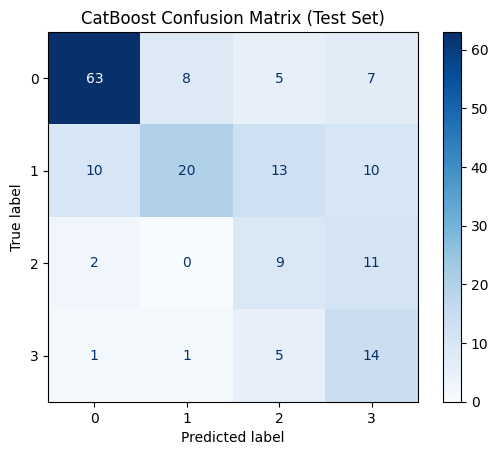

In [ ]:
best_catboost_params = {
    'n_estimators': 621,
    'learning_rate': 0.03406569859006729,
    'depth': 3,
    'l2_leaf_reg': 5.399553295165234,
    'subsample': 0.7816861432700138,
    'colsample_bylevel': 0.7931359961800241,
    'bootstrap_type': 'Bernoulli', # Make sure to include this from your previous search
    'class_weights': None, # As found by Optuna
    'loss_function': 'MultiClass', # Keep this explicit
    'random_state': RANDOM_STATE,
    'verbose': 0
}

# Add GPU setting if enabled
if USE_GPU:
    best_catboost_params['task_type'] = 'GPU'
    best_catboost_params['devices'] = '0'

# --- Build the Final Pipeline ---
# We use SMOTETomek as decided and initialize CatBoost with the best parameters.
final_cat_pipeline = Pipeline([
    ('balancer', SMOTETomek(random_state=RANDOM_STATE)),
    ('model', CatBoostClassifier(**best_catboost_params))
])

# --- Train the Final Pipeline ---
print("--- Training the final CatBoost pipeline on X_train ---")
# Ensure X_train and y_train are defined and available
final_cat_pipeline.fit(X_train, y_train)
print("--- Training Complete ---")

# --- Make Predictions on the Test Set ---
print("--- Making predictions on X_test ---")
# Ensure X_test and y_test are defined and available
y_pred = final_cat_pipeline.predict(X_test)

# --- Evaluate the Model ---

# 1. Classification Report
print("\n--- Classification Report ---")
report = classification_report(y_test, y_pred)
print(report)
print('cv mean: ', cross_val_score(final_cat_pipeline, X_train, y_train, cv=cv_out, scoring='f1_macro', n_jobs=-1).mean() * 100)
print('cv std: ', cross_val_score(final_cat_pipeline, X_train, y_train, cv=cv_out, scoring='f1_macro', n_jobs=-1).std() * 100)

# 2. Confusion Matrix
print("\n--- Confusion Matrix ---")
cm = confusion_matrix(y_test, y_pred)
# print(cm) # You can print the raw array if you like

# 3. Visual Confusion Matrix
# This provides a much clearer view, especially for multiclass.
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title("CatBoost Confusion Matrix (Test Set)")
plt.show()

## ensembling

In [125]:
br_final = Pipeline(steps=[
        ('balancer', TomekLinks(sampling_strategy='majority')),
        ('model', BalancedRandomForestClassifier(
                max_depth=25,
                min_samples_leaf=2,
                min_samples_split=5,
                n_estimators=120,
                random_state=42
            )
        )
    ])

xgb_final_params = {
    'n_estimators': 621,
    'learning_rate': 0.03406569859006729,
    'depth': 3,
    'l2_leaf_reg': 5.399553295165234,
    'subsample': 0.7816861432700138,
    'colsample_bylevel': 0.7931359961800241,
    'bootstrap_type': 'Bernoulli', # Make sure to include this from your previous search
    'class_weights': None, # As found by Optuna
    'loss_function': 'MultiClass', # Keep this explicit
    'random_state': RANDOM_STATE,
    'verbose': 0
}

xgb_final = Pipeline([
    ('balancer', TomekLinks(sampling_strategy='majority')),  # if it helped your results
    ('model', XGBClassifier(
        **xgb_final_params
    ))
])

cat_final_params = {
    'n_estimators': 621,
    'learning_rate': 0.03406569859006729,
    'depth': 3,
    'l2_leaf_reg': 5.399553295165234,
    'subsample': 0.7816861432700138,
    'colsample_bylevel': 0.7931359961800241,
    'bootstrap_type': 'Bernoulli', # Make sure to include this from your previous search
    'class_weights': None, # As found by Optuna
    'loss_function': 'MultiClass', # Keep this explicit
    'random_state': RANDOM_STATE,
    'verbose': 0
}

cat_final = Pipeline([
    ('balancer', SMOTETomek(random_state=42)),  # keep whatever worked best
    ('model', CatBoostClassifier(
        **cat_final_params
    ))
])

rf_final = Pipeline(
    steps=[
        ('balancer', TomekLinks(sampling_strategy='majority')),
        ('model', RandomForestClassifier(
                class_weight='balanced', 
                max_depth=70,
                min_samples_leaf=2,
                min_samples_split=16, 
                n_estimators=1176,
                random_state=42
            )
        )])

## stacking

In [128]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import RidgeClassifier, RidgeClassifierCV

In [211]:
cat_model = cat_final

br_model = br_final

rf_model = rf_final

xg_model = xgb_final

final_estimator_model = LogisticRegression(C=1.5, random_state=42, n_jobs=-1)
# Pipeline(
    # steps=[
    #     ('balancer', SMOTEN(random_state=42)),
        # ('model', LogisticRegression(C=1.5, random_state=42))
    # ])
    
final_estimator_rf = RandomForestClassifier(
    n_estimators=150, # Keep it reasonable
    max_depth=7,      # Don't let it get too deep
    min_samples_leaf=5, # Prevent overfitting small groups
    random_state=RANDOM_STATE,
    n_jobs=-1,
    class_weight='balanced'
)

stacking = StackingClassifier(
    estimators=[
        ('rf', rf_model),
        ('xgb', xg_model),
        ('br', br_model),
        ('cat', cat_model)
    ],
    final_estimator=final_estimator_rf,
    cv=cv_out,
    passthrough=False
)

pipeline = Pipeline(steps=[
    ('model', stacking)
])

pipeline.fit(X_train, y_train)

KeyboardInterrupt: 

In [ ]:
y_pred_stacking = pipeline.predict(X_test)

print(classification_report(y_test, y_pred_stacking))
print('cv mean: ', cross_val_score(pipeline, X_train, y_train, cv=cv_out, verbose=3, n_jobs=-1, scoring='f1_macro').mean()*100)
print('cv std: ', cross_val_score(pipeline, X_train, y_train, cv=cv_out, verbose=3, n_jobs=-1, scoring='f1_macro').std()*100)
cm = confusion_matrix(y_test, y_pred_stacking)
print(cm)

              precision    recall  f1-score   support

           0       0.82      0.76      0.79        83
           1       0.80      0.38      0.51        53
           2       0.23      0.45      0.30        22
           3       0.24      0.38      0.30        21

    accuracy                           0.56       179
   macro avg       0.52      0.49      0.47       179
weighted avg       0.67      0.56      0.59       179



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of  10 | elapsed:  2.0min remaining:  4.7min
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:  2.2min remaining:   56.9s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:  2.2min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


cv mean:  45.66137028416263


[Parallel(n_jobs=-1)]: Done   3 out of  10 | elapsed:  1.9min remaining:  4.4min
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:  2.2min remaining:   56.6s


cv std:  5.102684253816445
[[63  3 10  7]
 [10 20 14  9]
 [ 2  1 10  9]
 [ 2  1 10  8]]


[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:  2.3min finished


baseline score:

```
precision    recall  f1-score   support

           0       0.80      0.77      0.79        83
           1       0.50      0.53      0.51        53
           2       0.35      0.36      0.36        22
           3       0.40      0.38      0.39        21

    accuracy                           0.60       179
   macro avg       0.51      0.51      0.51       179
weighted avg       0.61      0.60      0.61       179

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of  10 | elapsed:  1.9min remaining:  4.5min
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:  2.2min remaining:   56.3s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:  2.2min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
cv mean:  43.00689709171166
[Parallel(n_jobs=-1)]: Done   3 out of  10 | elapsed:  2.0min remaining:  4.6min
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:  2.3min remaining:   59.0s
cv std:  6.766065030623213
[[64 14  2  3]
 [13 28  7  5]
 [ 2  8  8  4]
 [ 1  6  6  8]]
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:  2.3min finished
```

In [ ]:
def objective_tune_meta_lr(trial):
    lr_c = trial.suggest_float('lr_C', 5, 15, log=True) 
    lr_penalty = trial.suggest_categorical('lr_penalty', ['l1', 'l2'])
    lr_penalty = 'l1'
    lr_solver = 'liblinear'
    # if lr_penalty == 'l1':
    #     lr_solver = 'liblinear'
    # else: # For 'l2'
    #     lr_solver = trial.suggest_categorical('lr_solver_for_l2', ['lbfgs', 'liblinear', 'saga'])

    meta_learner = LogisticRegression(
        C=lr_c,
        penalty=lr_penalty,
        solver=lr_solver,
        max_iter=1000,
        random_state=RANDOM_STATE,
        n_jobs=-1
    )

    stacking_pipeline = StackingClassifier(
        estimators=[
            ('rf', rf_final),
            ('xgb', xgb_final),
            ('br', br_final),
            ('cat', cat_final)
        ],
        final_estimator=meta_learner,
        cv=cv_out,
        passthrough=False,
        n_jobs=-1 
    )

    try:
        f1_scorer = make_scorer(f1_score, average='macro')
        score = cross_val_score(stacking_pipeline, X_train, y_train, cv=cv_out, scoring=f1_scorer, n_jobs=1).mean()
    except Exception as e:
        print(f"Trial failed with error: {e}")
        return 0.0

    return score

print("--- Starting Optuna Study for Meta-Learner Tuning ---")
study_meta_lr = optuna.create_study(direction='maximize')
study_meta_lr.optimize(objective_tune_meta_lr, n_trials=30)

print("\n--- Meta-Learner Optuna Study Complete ---")
print("Best trial number:", study_meta_lr.best_trial.number)
print("Best F1 Macro:", study_meta_lr.best_value)
print("Best Meta-Learner Params:", study_meta_lr.best_params)

[I 2025-05-29 21:04:42,444] A new study created in memory with name: no-name-18d68966-b274-4031-9cc4-d788526ba5ba


--- Starting Optuna Study for Meta-Learner Tuning ---


[I 2025-05-29 21:08:22,918] Trial 0 finished with value: 0.43071254231661643 and parameters: {'lr_C': 7.666107077830449, 'lr_penalty': 'l2'}. Best is trial 0 with value: 0.43071254231661643.
[I 2025-05-29 21:12:10,917] Trial 1 finished with value: 0.42165531551851343 and parameters: {'lr_C': 10.853166247732444, 'lr_penalty': 'l2'}. Best is trial 0 with value: 0.43071254231661643.
[I 2025-05-29 21:15:48,790] Trial 2 finished with value: 0.42157200075405565 and parameters: {'lr_C': 10.15331051754892, 'lr_penalty': 'l1'}. Best is trial 0 with value: 0.43071254231661643.
[I 2025-05-29 21:19:26,323] Trial 3 finished with value: 0.4249018675107461 and parameters: {'lr_C': 11.894052875503412, 'lr_penalty': 'l1'}. Best is trial 0 with value: 0.43071254231661643.
[I 2025-05-29 21:22:57,033] Trial 4 finished with value: 0.42157200075405565 and parameters: {'lr_C': 10.442454323039968, 'lr_penalty': 'l1'}. Best is trial 0 with value: 0.43071254231661643.
[I 2025-05-29 21:25:58,683] Trial 5 finishe


--- Meta-Learner Optuna Study Complete ---
Best trial number: 19
Best F1 Macro: 0.4322845636651286
Best Meta-Learner Params: {'lr_C': 6.187918203281458, 'lr_penalty': 'l2'}


In [126]:
cat_model = cat_final

br_model = br_final

rf_model = rf_final

xg_model = xgb_final

# Pipeline(
    # steps=[
    #     ('balancer', SMOTEN(random_state=42)),
        # ('model', LogisticRegression(C=1.5, random_state=42))
    # ])
    
# final_estimator_rf = RandomForestClassifier(
#     n_estimators=150, # Keep it reasonable
#     max_depth=7,      # Don't let it get too deep
#     min_samples_leaf=5, # Prevent overfitting small groups
#     random_state=RANDOM_STATE,
#     n_jobs=-1,
#     class_weight='balanced'
# )

final_estimator_model = LogisticRegression(C=6.187918203281458, penalty='l2', random_state=42, n_jobs=-1, solver='liblinear', max_iter=1000,)

# stacking = StackingClassifier(
#     estimators=[
#         ('rf', rf_model),
#         ('xgb', xg_model),
#         ('br', br_model),
#         ('cat', cat_model)
#     ],
#     final_estimator=final_estimator_model,
#     cv=cv_out,
#     passthrough=False
# )

# pipeline = Pipeline(steps=[
#     ('model', stacking)
# ])

# pipeline.fit(X_train, y_train)

In [237]:
y_pred_stacking = pipeline.predict(X_test)

print(classification_report(y_test, y_pred_stacking))
print('cv mean: ', cross_val_score(pipeline, X_train, y_train, cv=cv_out, verbose=3, n_jobs=-1, scoring='f1_macro').mean()*100)
print('cv std: ', cross_val_score(pipeline, X_train, y_train, cv=cv_out, verbose=3, n_jobs=-1, scoring='f1_macro').std()*100)
cm = confusion_matrix(y_test, y_pred_stacking)
print(cm)

              precision    recall  f1-score   support

           0       0.78      0.83      0.81        83
           1       0.56      0.53      0.54        53
           2       0.47      0.41      0.44        22
           3       0.41      0.43      0.42        21

    accuracy                           0.64       179
   macro avg       0.56      0.55      0.55       179
weighted avg       0.64      0.64      0.64       179



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of  10 | elapsed:  1.7min remaining:  3.9min
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:  1.7min remaining:   42.9s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:  1.7min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


cv mean:  43.234394597769445


[Parallel(n_jobs=-1)]: Done   3 out of  10 | elapsed:  1.6min remaining:  3.6min
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:  1.6min remaining:   41.1s


cv std:  6.625274040925897
[[69 10  1  3]
 [14 28  5  6]
 [ 3  6  9  4]
 [ 2  6  4  9]]


[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:  1.6min finished


final_estimator_model = LogisticRegression(C=7.299396807027398, penalty='l1', random_state=42, n_jobs=-1, solver='liblinear')

```
              precision    recall  f1-score   support

           0       0.78      0.83      0.80        83
           1       0.55      0.51      0.53        53
           2       0.44      0.36      0.40        22
           3       0.39      0.43      0.41        21

    accuracy                           0.63       179
   macro avg       0.54      0.53      0.54       179
weighted avg       0.62      0.63      0.63       179

```

### experimentation: further research for more performance -> researching lightGBM

In [241]:
def objective_lgbm(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 200, 2000),
        'learning_rate': trial.suggest_float('learning_rate', 0.005, 0.1, log=True),
        'num_leaves': trial.suggest_int('num_leaves', 20, 200),        # Key LGBM parameter
        'max_depth': trial.suggest_int('max_depth', 5, 20),          # Can be -1 to let num_leaves control
        'subsample': trial.suggest_float('subsample', 0.5, 1.0),     # Alias: bagging_fraction
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0), # Alias: feature_fraction
        'reg_alpha': trial.suggest_float('reg_alpha', 1e-3, 10.0, log=True),   # L1
        'reg_lambda': trial.suggest_float('reg_lambda', 1e-3, 10.0, log=True),  # L2
        'min_child_samples': trial.suggest_int('min_child_samples', 5, 50),
        'class_weight': trial.suggest_categorical('class_weight', [None, 'balanced']), # Crucial for imbalance
        'random_state': RANDOM_STATE,
        'verbose': -1, # Suppress LGBM's own verbosity
        'n_jobs': -1
    }

    if USE_GPU:
        params['device_type'] = 'gpu'

    model = LGBMClassifier(**params)

    try:
        f1_scorer = make_scorer(f1_score, average='macro')
        score = cross_val_score(model, X_train, y_train, cv=cv_out, scoring=f1_scorer, n_jobs=1).mean()
    except Exception as e:
        print(f"LGBM Trial failed with error: {e}")
        return 0.0 # Return a low score if a trial fails

    return score

print("--- Starting Optuna Study for LightGBM ---")
study_lgbm = optuna.create_study(direction='maximize')
study_lgbm.optimize(objective_lgbm, n_trials=300) # Aim for around 100 trials

print("\n--- LightGBM Optuna Study Complete ---")
print("Best trial number for LGBM:", study_lgbm.best_trial.number)
print("Best F1 Macro for LGBM:", study_lgbm.best_value)
print("Best LGBM Params:", study_lgbm.best_params)

[I 2025-05-29 22:47:18,235] A new study created in memory with name: no-name-aba09309-44dd-4627-9526-51772764590f


--- Starting Optuna Study for LightGBM ---


[I 2025-05-29 22:47:38,855] Trial 0 finished with value: 0.44257464128284213 and parameters: {'n_estimators': 1262, 'learning_rate': 0.021328785648294993, 'num_leaves': 99, 'max_depth': 9, 'subsample': 0.6348493305180988, 'colsample_bytree': 0.823403157086034, 'reg_alpha': 0.16169128623871518, 'reg_lambda': 4.349716938055618, 'min_child_samples': 12, 'class_weight': None}. Best is trial 0 with value: 0.44257464128284213.
[I 2025-05-29 22:47:54,999] Trial 1 finished with value: 0.44858951004605363 and parameters: {'n_estimators': 1163, 'learning_rate': 0.05233225221803309, 'num_leaves': 23, 'max_depth': 17, 'subsample': 0.5420085132845671, 'colsample_bytree': 0.5310052334361834, 'reg_alpha': 0.002548685110481458, 'reg_lambda': 1.9120541616117432, 'min_child_samples': 25, 'class_weight': None}. Best is trial 1 with value: 0.44858951004605363.
[I 2025-05-29 22:48:05,319] Trial 2 finished with value: 0.4399356813507686 and parameters: {'n_estimators': 590, 'learning_rate': 0.05702267850049

KeyboardInterrupt: 

In [240]:
lgbm_params = {
    'n_estimators': 1223,
    'learning_rate': 0.006051501635028181,
    'num_leaves': 171,
    'max_depth': 14,
    'subsample': 0.6282583672011974,         # Also known as bagging_fraction
    'colsample_bytree': 0.6568629715755284,   # Also known as feature_fraction
    'reg_alpha': 0.049912506063072244,        # L1 regularization
    'reg_lambda': 1.0194036029471227,         # L2 regularization
    'min_child_samples': 48,
    'class_weight': 'balanced',              # As found by Optuna
    'random_state': RANDOM_STATE,
    'verbose': -1,                           # Suppress LGBM's verbosity
    'n_jobs': -1                             # Use all cores for LGBM training
}

lgbm_pipeline = Pipeline(
    steps=[
        ('model', LGBMClassifier(**lgbm_params))
    ]
)

lgbm_pipeline.fit(X_train, y_train)

lgbm_final = lgbm_pipeline

In [242]:
y_pred_lgbm = lgbm_pipeline.predict(X_test)
print("\n--- LGBM Test Set Classification Report ---")
print(classification_report(y_test, y_pred_lgbm))
print('cv mean: ', cross_val_score(lgbm_pipeline, X_train, y_train, cv=cv_out, verbose=3, n_jobs=-1, scoring='f1_macro').mean()*100)
print('cv std: ', cross_val_score(lgbm_pipeline, X_train, y_train, cv=cv_out, verbose=3, n_jobs=-1, scoring='f1_macro').std()*100)
cm = confusion_matrix(y_test, y_pred_lgbm)
print(cm)


--- LGBM Test Set Classification Report ---
              precision    recall  f1-score   support

           0       0.80      0.69      0.74        83
           1       0.51      0.49      0.50        53
           2       0.16      0.18      0.17        22
           3       0.25      0.38      0.30        21

    accuracy                           0.53       179
   macro avg       0.43      0.44      0.43       179
weighted avg       0.57      0.53      0.55       179



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


KeyboardInterrupt: 

## experiment: voting

In [238]:
from sklearn.ensemble import VotingClassifier

In [245]:
voting_clf = VotingClassifier(
    estimators=[
        ('rf', rf_final),
        ('xgb', xgb_final),
        ('br', br_final),
        ('cat', cat_final),
        # ('lgbm', lgbm_final) # Add your tuned LGBM
    ],
    voting='soft', # Use 'soft' for probability averaging
    n_jobs=-1,      # Use all CPU cores
    weights=[0.15, 0.20, 0.15, 0.30],
)

# --- Fit and Evaluate ---
print("--- Starting VotingClassifier Fit ---")
# Ensure X_train, y_train, X_test, y_test are available
voting_clf.fit(X_train, y_train)
y_pred_voting = voting_clf.predict(X_test)

print("\n--- VotingClassifier Classification Report ---")
# from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
# import matplotlib.pyplot as plt
print(classification_report(y_test, y_pred_voting))

print("\n--- VotingClassifier Confusion Matrix ---")
cm_voting = confusion_matrix(y_test, y_pred_voting)
# disp_voting = ConfusionMatrixDisplay(confusion_matrix=cm_voting) # Use your class labels if you have them
# disp_voting.plot(cmap=plt.cm.Blues)
# plt.title("VotingClassifier Confusion Matrix (Test Set)")
# plt.show()
print(cm_voting)

# --- Optional: Cross-validate the VotingClassifier ---
print("\n--- Cross-validating VotingClassifier ---")
f1_scorer = make_scorer(f1_score, average='macro')
cv_scores_voting = cross_val_score(voting_clf, X_train, y_train, cv=cv_out, scoring=f1_scorer, n_jobs=-1, verbose=3)
print(f"VotingClassifier CV F1 Macro Mean: {cv_scores_voting.mean()*100:.2f}%")
print(f"VotingClassifier CV F1 Macro Std: {cv_scores_voting.std()*100:.2f}%")

--- Starting VotingClassifier Fit ---

--- VotingClassifier Classification Report ---
              precision    recall  f1-score   support

           0       0.81      0.72      0.76        83
           1       0.57      0.49      0.53        53
           2       0.30      0.36      0.33        22
           3       0.34      0.52      0.42        21

    accuracy                           0.59       179
   macro avg       0.50      0.53      0.51       179
weighted avg       0.62      0.59      0.60       179


--- VotingClassifier Confusion Matrix ---
[[60 11  6  6]
 [11 26  8  8]
 [ 2  5  8  7]
 [ 1  4  5 11]]

--- Cross-validating VotingClassifier ---


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


VotingClassifier CV F1 Macro Mean: 47.74%
VotingClassifier CV F1 Macro Std: 3.69%


[Parallel(n_jobs=-1)]: Done   3 out of  10 | elapsed:   11.2s remaining:   26.3s
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:   11.3s remaining:    4.8s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   11.3s finished


# final model

In [130]:
pipeline = Pipeline(steps=[
    ('model', cat_final)
])

pipeline.fit(X_train, y_train)

y_pred_stacking = pipeline.predict(X_test)

print(classification_report(y_test, y_pred_stacking))
print('cv mean: ', cross_val_score(pipeline, X_train, y_train, cv=cv_out, verbose=3, n_jobs=-1, scoring='f1_macro').mean()*100)
# print('cv std: ', cross_val_score(pipeline, X_train, y_train, cv=cv_out, verbose=3, n_jobs=-1, scoring='f1_macro').std()*100)
cm = confusion_matrix(y_test, y_pred_stacking)
print(cm)

              precision    recall  f1-score   support

           0       0.81      0.80      0.80        83
           1       0.80      0.38      0.51        53
           2       0.27      0.36      0.31        22
           3       0.28      0.57      0.38        21

    accuracy                           0.59       179
   macro avg       0.54      0.53      0.50       179
weighted avg       0.68      0.59      0.61       179



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of  10 | elapsed:    8.2s remaining:   19.3s


cv mean:  46.10754818836176
[[66  5  5  7]
 [11 20 10 12]
 [ 2  0  8 12]
 [ 2  0  7 12]]


[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    8.8s remaining:    3.7s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    8.9s finished


In [129]:
stacking = StackingClassifier(
    estimators=[
        ('rf', rf_model),
        ('xgb', xg_model),
        ('br', br_model),
        ('cat', cat_model)
    ],
    final_estimator=final_estimator_model,
    cv=cv_out,
    passthrough=False
)

pipeline = Pipeline(steps=[
    ('model', stacking)
])

pipeline.fit(X_train, y_train)

y_pred_stacking = pipeline.predict(X_test)

print(classification_report(y_test, y_pred_stacking))
# print('cv mean: ', cross_val_score(pipeline, X_train, y_train, cv=cv_out, verbose=3, n_jobs=-1, scoring='f1_macro').mean()*100)
# print('cv std: ', cross_val_score(pipeline, X_train, y_train, cv=cv_out, verbose=3, n_jobs=-1, scoring='f1_macro').std()*100)
cm = confusion_matrix(y_test, y_pred_stacking)
print(cm)

              precision    recall  f1-score   support

           0       0.78      0.83      0.81        83
           1       0.56      0.53      0.54        53
           2       0.47      0.41      0.44        22
           3       0.41      0.43      0.42        21

    accuracy                           0.64       179
   macro avg       0.56      0.55      0.55       179
weighted avg       0.64      0.64      0.64       179

[[69 10  1  3]
 [14 28  5  6]
 [ 3  6  9  4]
 [ 2  6  4  9]]


# Summary:

brief recap:

this project is done to make predicting heart disease into four distinct categories (0 is not sick, 1-3 is the severity of the heart disease), with a focus on using f1_macro as it's score due to the class distribution being imbalanced (4:2:1:1) split

---

final model: 

4 base learner with 1 meta learner and is wrapped using an ensembling technique that is 'Stacking'

---

models tried:

- lgbm: dropped because of lower performance than base/not tuned yet logistic regression
- rf: used as base model
- brf: used as base model
- CatBoost: used as base model (best individual performance by far, "~50.4% F1 Macro" from optuna, and manual CV: ~46%)
- xgboost: used as base model (second best individual model)
- logistic regression: used as meta learner (tuned not in isolated environment, but with simmulating the ensemble itself)
- rf: tried using this as the meta learner (just used the base model) as a test if it's better than logistic regression or compare, but the result is not close so it's decided to just use lr instead even though maybe with a more tuned model, this can perform better

---

final model performance:

```
              precision    recall  f1-score   support

           0       0.78      0.83      0.81        83
           1       0.56      0.53      0.54        53
           2       0.47      0.41      0.44        22
           3       0.41      0.43      0.42        21

    accuracy                           0.64       179
   macro avg       0.56      0.55      0.55       179
weighted avg       0.64      0.64      0.64       179

[[69 10  1  3]
 [14 28  5  6]
 [ 3  6  9  4]
 [ 2  6  4  9]]
```

---

What is learned in this dataset:

- Every model, even though uses the same dataset prefers different sampler. Though, TomekLinks is very very much prefered (used in 3/4 in the base models)
- Using ensembling is very effective, it's able to boost the very best individual model (59% accuracy and 51% macro) into 64% accuracy and 55% macro albeit the need to tune the ensemble a bit
- Using Stacking is more preferred than Voting since besides catboost, other models performance is kinda shaky, even though Stacking needs to be set up first. Even though Stacking needs more setup, but because of the algorithm's ability to learn the optimal weight of each models makes it more effective than the simpler averaging approach of Voting
- Picking the meta learner is also a challange since this project has a relative quick time limit, we needed a good base model that can be good with minimal tuning needed
- Tuning the ensemble (stacking) in and of itself is a challange since it's needed to simmulate the entire Stacking environment for every iteration so it can take a long time
- Learned to use new libraries (branching out to just using sklearns and imblearns which can be seen at the start), what's new is optuna, which is very handy in needing to tune very complex models such as catboost and xgboost, and obviously ensembling (Stacking)
- Even though if we calculate only the yes/no proportion being 6:4, if we want to predict the stage of the heart disease in it's own, it's imbalanced (4:2:1:1)

---

Limitations:

- time: very limited, especially since the need to learn the basics while doing this project (can be seen by how many iterations this project is -> already V7)
- time management: alocating time to this project is very hard since if the device is used for training the model, the device is unable to be used, which in hindsight, makes optuna such a godsend since it cuts so much time needed for this project because of it's optimization of grid search, making it less random than RandomizedSearchCV while also significantly faster than GridSearchCV using it's bayesian search method
- device limitations: the device used is not the top of the line spec of today, which is one of the reason this project took so long
- low quantity of data: because of the dataset having minority classes (1-3), the need to artificially sample the dataset is a problem since doing this may resulted in a loss of information (not a 'real' case), if the dataset is updated into a more balanced dataset, the performance of each class should increase also
- the need to drop 1 class: this dataset actually has 5 classes, but because of just having 28 data, we decided to drop it because we can't get enough information to predict the class

---

Future Work/Recommendation:
- Definitely will try other datasets/projects and a much more challanging one at that
- Or actually when our skills are better, trying this dataset again seems fun by implementing newer skillsets that we are not aware of right now, such things as:
- Further feature engineering: given the theory of how significant feature engineering can be, more can be done such as creating a more advanced feature selection (tailored to minimizes class 2 and 3 weaknesses) can get better results
- Exploring different meta learners: since time is at the essence right now, we can only try out base rf as the alternative and tune only with lr, exploration of a more complex meta learner such as a tuned rf, lgbm, or other models can yeild a better result too
- Data augmentation for minority classes: getting more data or a more refined handling for minority classes (mainly 2 and 3)